<a href="https://colab.research.google.com/github/chetansgode/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis




##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Chetan S. Gode


# **Project Summary -**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



# **GitHub Link -**

https://github.com/chetansgode/Zomato-Restaurant-Clustering-and-Sentiment-Analysis.git

# **Problem Statement**


* Analysing the Zomato restaurant data for each city in India to get some important insight.
* Analyze Customers Reviews and make some useful conclusion in the form of Visualizations.
* Cluster the zomato restaurants into different segments.
* costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering

import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
# Load Dataset
df_metadata=pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
df_review=pd.read_csv('/content/Zomato Restaurant reviews.csv',parse_dates=['Time'])

### Dataset First View

In [3]:
# Dataset First Look
df_metadata.head()


Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [4]:
df_review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [5]:
# Merge two data set
df=df_metadata.merge(df_review,left_on='Name',right_on='Restaurant',how='left')

In [6]:
df.head()

Name                                              Links Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings       Restaurant  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Beyond Flavours   

               Reviewer                                             Review  \
0     Rusha Chakraborty  The ambience was good, food was quite good . h...   
1  Anusha Tirumalaneedi  Ambience is too good for a pleasant evening. S...   
2       Ashok Shekhawat  A must try.. great food great ambience. Thnx f...   
3        Swapnil Sarkar  Soumen das and Arun was a great guy. Only beca...   
4                Dileep  Food is good.we ordered Kodi drumsticks and ba...   

  Rating                 Metadata                Time  Pictures  
0      5   1 Review , 2 Followers 2019-05-25 15:54:00       0.0  
1      5  3 Reviews , 2 Followers 2019-05-25 14:20:00       0.0  
2      5  2 Reviews , 3 Followers 2019-05-24 22:54:00       0.0  
3      5    1 Review , 1 Follower 2019-05-24 22:11:00       0.0  
4      5  3 Reviews , 2 Followers 2019-05-24 21:37:00       0.0

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
shape_df=df.shape
print(f'Dataset has no. of Rows are - {shape_df[0]}')
print(f'Dataset has no. of Columns are - {shape_df[1]}')

Dataset has no. of Rows are - 10005
Dataset has no. of Columns are - 13


### Dataset Information

In [8]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         10005 non-null  object        
 1   Links        10005 non-null  object        
 2   Cost         10005 non-null  object        
 3   Collections  5001 non-null   object        
 4   Cuisines     10005 non-null  object        
 5   Timings      9905 non-null   object        
 6   Restaurant   10000 non-null  object        
 7   Reviewer     9962 non-null   object        
 8   Review       9955 non-null   object        
 9   Rating       9962 non-null   object        
 10  Metadata     9962 non-null   object        
 11  Time         9962 non-null   datetime64[ns]
 12  Pictures     10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.1+ MB
None


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print('No of duplicates value - ',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('No. of duplicate value after dropping - ',df.duplicated().sum())

No of duplicates value -  36
No. of duplicate value after dropping -  0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

Name              0
Links             0
Cost              0
Collections    5004
Cuisines          0
Timings         100
Restaurant        5
Reviewer          7
Review           14
Rating            7
Metadata          7
Time              7
Pictures          5
dtype: int64

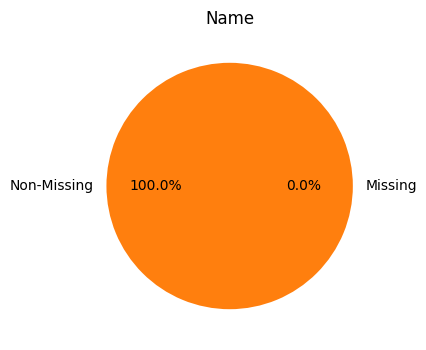

------------------------------------------------------------


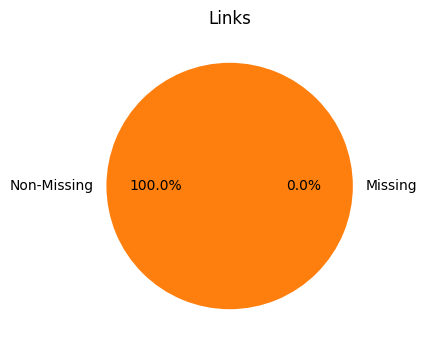

------------------------------------------------------------


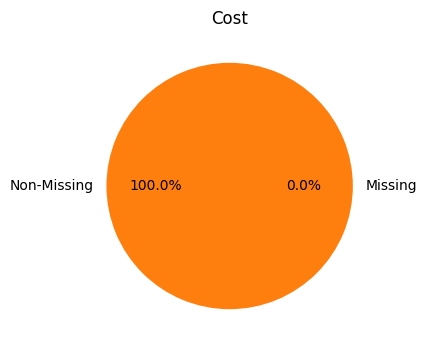

------------------------------------------------------------


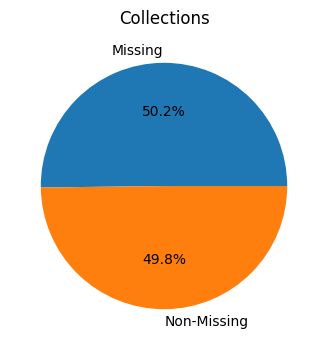

------------------------------------------------------------


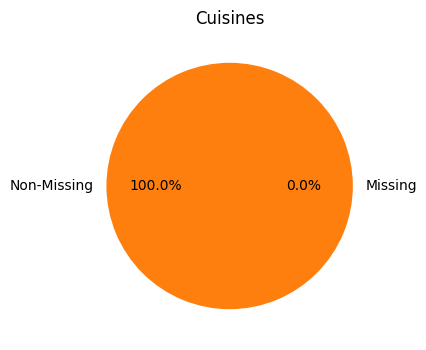

------------------------------------------------------------


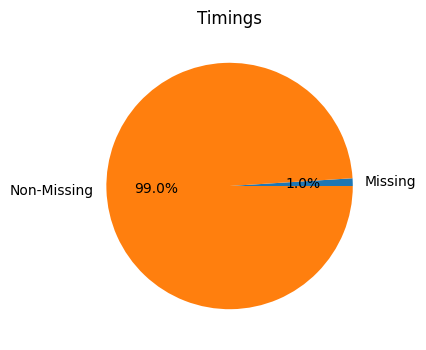

------------------------------------------------------------


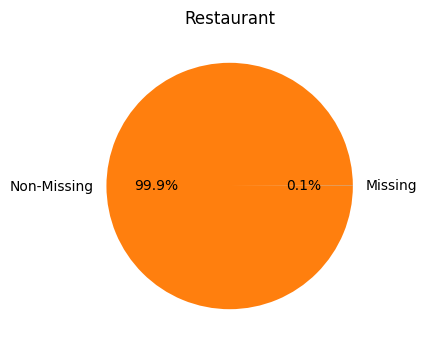

------------------------------------------------------------


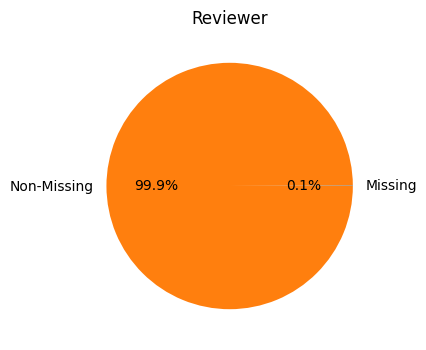

------------------------------------------------------------


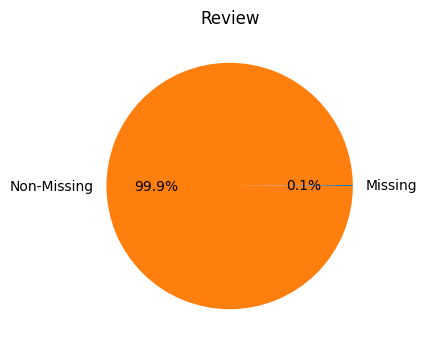

------------------------------------------------------------


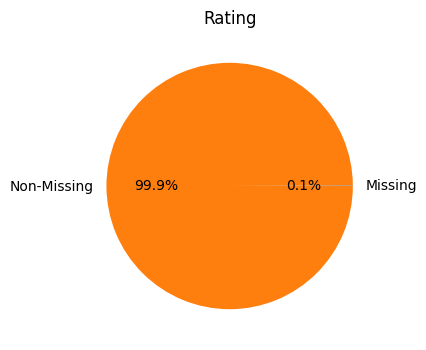

------------------------------------------------------------


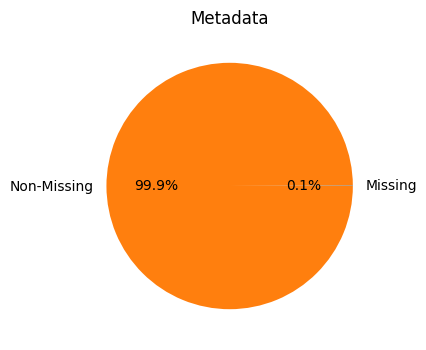

------------------------------------------------------------


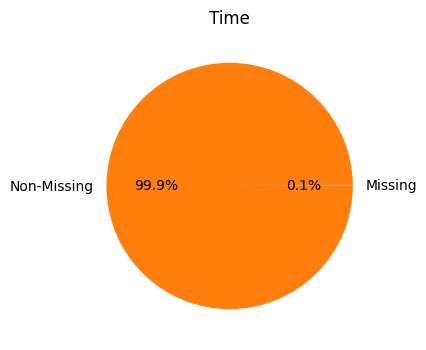

------------------------------------------------------------


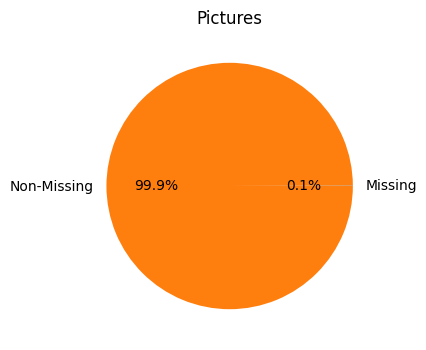

------------------------------------------------------------
Dataset have total None values 
 Name              0
Links             0
Cost              0
Collections    4893
Cuisines          0
Timings           0
Restaurant        0
Reviewer          0
Review            0
Rating            0
Metadata          0
Time              0
Pictures          0
dtype: int64
Shape of data set before dropping none value 
 (9969, 13)
Shape of data set after dropping none value 
 (9855, 13)


In [11]:
# Visualizing the missing values
for i in df.columns:
  # Calculate the percentage of missing values
  missing_percentage = df[i].isna().sum() * 100 / len(df)
  # Calculate the percentage of non-missing values
  non_missing_percentage = 100 - missing_percentage

  # Create a list of values for the pie chart
  values = [missing_percentage, non_missing_percentage]

  # Create labels for the pie chart segments
  labels = ['Missing', 'Non-Missing']

  # Create the pie chart
  plt.figure(figsize=(4,4))
  plt.pie(values, labels=labels, autopct='%1.1f%%')
  plt.title(i)
  plt.show()
  print('--'*30)
shapes=df.shape
# droping na value from dataset except 'Collection' variable
df.dropna(subset=['Name', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],inplace=True)
# Changing dataset after dropping None value
print('Dataset have total None values \n',df.isna().sum())
print('Shape of data set before dropping none value \n',shapes)
print('Shape of data set after dropping none value \n',df.shape)

In [12]:
# convert 'Cost' data type from object to Integer form
df['Cost']=df['Cost'].str.replace(',', '').astype('int64')
#convert Rating into integer form by replacing string value by float
df[df['Rating']=='Like']=3
df['Rating']=df['Rating'].astype('float')
# Convert 'Pictures' object to interger form
df['Pictures']=df['Pictures'].astype('int')
#drop columns Restaurant
df.drop('Restaurant',axis=1,inplace=True)

# convert datetime format
df['Time'] = df['Time'].apply(lambda x: pd.to_datetime(x, errors='coerce'))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         9855 non-null   object        
 1   Links        9855 non-null   object        
 2   Cost         9855 non-null   int64         
 3   Collections  4963 non-null   object        
 4   Cuisines     9855 non-null   object        
 5   Timings      9855 non-null   object        
 6   Reviewer     9855 non-null   object        
 7   Review       9855 non-null   object        
 8   Rating       9855 non-null   float64       
 9   Metadata     9855 non-null   object        
 10  Time         9855 non-null   datetime64[ns]
 11  Pictures     9855 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1000.9+ KB


### What did you know about your dataset?

Data set have Some variable has none value so We have drop that value whos percent is less than 1 and collections variable has 50.2% none value.

Some integer variable has data set in the form of object so we convert them into integer form.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
print(df.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'],
      dtype='object')


In [15]:
# Dataset Describe
df.describe(include='all')

Name                                              Links  \
count              9855                                               9855   
unique              100                                                100   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                100                                                100   
first               NaN                                                NaN   
last                NaN                                                NaN   
mean                NaN                                                NaN   
std                 NaN                                                NaN   
min                 NaN                                                NaN   
25%                 NaN                                                NaN   
50%                 NaN                                                NaN   
75%                 NaN                                                NaN   
max                 NaN                                                NaN   

               Cost                                  Collections  \
count   9855.000000                                         4963   
unique          NaN                                           43   
top             NaN  Food Hygiene Rated Restaurants in Hyderabad   
freq            NaN                                          377   
first           NaN                                          NaN   
last            NaN                                          NaN   
mean     871.456418                                          NaN   
std      506.081885                                          NaN   
min        3.000000                                          NaN   
25%      500.000000                                          NaN   
50%      700.000000                                          NaN   
75%     1200.000000                                          NaN   
max     2800.000000                                          NaN   

                     Cuisines         Timings Reviewer Review       Rating  \
count                    9855            9855     9855   9855  9855.000000   
unique                     89              75     7394   9264          NaN   
top     North Indian, Chinese  11 AM to 11 PM   Ankita   good          NaN   
freq                      397             499       13    237          NaN   
first                     NaN             NaN      NaN    NaN          NaN   
last                      NaN             NaN      NaN    NaN          NaN   
mean                      NaN             NaN      NaN    NaN     3.603044   
std                       NaN             NaN      NaN    NaN     1.484481   
min                       NaN             NaN      NaN    NaN     1.000000   
25%                       NaN             NaN      NaN    NaN     3.000000   
50%                       NaN             NaN      NaN    NaN     4.000000   
75%                       NaN             NaN      NaN    NaN     5.000000   
max                       NaN             NaN      NaN    NaN     5.000000   

        Metadata                           Time     Pictures  
count       9855                           9855  9855.000000  
unique      2466                           9677          NaN  
top     1 Review            2019-05-05 22:39:00          NaN  
freq         906                              3          NaN  
first        NaN  1970-01-01 00:00:00.000000003          NaN  
last         NaN            2019-05-25 20:23:00          NaN  
mean         NaN                            NaN     0.752106  
std          NaN                            NaN     2.579041  
min          NaN                            NaN     0.000000  
25%          NaN                            NaN     0.000000  
50%          NaN                            NaN     0.000000  
75%          NaN                            NaN     0.000000  
max          NaN                            NaN    64.000000

### Variables Description

In [16]:
Descriptions=['Name of Restaurant','URL link of Restaurant','Per person estimated cost of dinning','Tagging of Restaurant w.r.t. Zomato category','Cuisines serve by Restaurant',
      'Restaurant timing','Name of reviwer','Review text','Rating provided','Reviewer metadata_No of review and followers','Date and time of review','No picture posted with review']
print('Dataset information\n')
Variables_Description=pd.DataFrame(list(zip(df.columns,Descriptions)),columns=['Variable','Description'])
print(Variables_Description)

Dataset information

       Variable                                   Description
0          Name                            Name of Restaurant
1         Links                        URL link of Restaurant
2          Cost          Per person estimated cost of dinning
3   Collections  Tagging of Restaurant w.r.t. Zomato category
4      Cuisines                  Cuisines serve by Restaurant
5       Timings                             Restaurant timing
6      Reviewer                               Name of reviwer
7        Review                                   Review text
8        Rating                               Rating provided
9      Metadata  Reviewer metadata_No of review and followers
10         Time                       Date and time of review
11     Pictures                 No picture posted with review


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for j, i in enumerate(df.columns):
  no_unique_value=df[i].nunique()
  no_value_count=df[i].value_counts()
  print(f"{j+1}- No of Unique {i} value is \n -{no_unique_value}")
  print(f"{j+1}- No of unique {i} value counts are \n -{no_value_count}")
  print('--'*30)

1- No of Unique Name value is 
 -100
1- No of unique Name value counts are 
 -Beyond Flavours                          100
Eat India Company                        100
The Indi Grill                           100
The Tilt Bar Republic                    100
Yum Yum Tree - The Arabian Food Court    100
                                        ... 
Amul                                      99
Hyderabad Chefs                           98
Arena Eleven                              85
American Wild Wings                       77
3                                          1
Name: Name, Length: 100, dtype: int64
------------------------------------------------------------
2- No of Unique Links value is 
 -100
2- No of unique Links value counts are 
 -https://www.zomato.com/hyderabad/beyond-flavours-gachibowli                        100
https://www.zomato.com/hyderabad/eat-india-company-gachibowli                      100
https://www.zomato.com/hyderabad/the-indi-grill-gachibowli                

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
df['Time'][0]

Timestamp('2019-05-25 15:54:00')

In [19]:
# Write your code to make your dataset analysis ready.

#Create new variable day,year,month and hour for checking review of customer with time.
df['Year']=df['Time'].dt.year
df['Day']=df['Time'].dt.day
df['Month']=df['Time'].dt.month
df['Hour']=df['Time'].dt.hour



In [20]:
df.head(2)

Name                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   

                  Metadata                Time  Pictures  Year  Day  Month  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  2019   25      5   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  2019   25      5   

   Hour  
0    15  
1    14

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Name
Collage - Hyatt Hyderabad Gachibowli                 2800.0
Feast - Sheraton Hyderabad Hotel                     2500.0
Jonathan's Kitchen - Holiday Inn Express & Suites    1900.0
10 Downing Street                                    1900.0
Cascade - Radisson Hyderabad Hitec City              1800.0
Zega - Sheraton Hyderabad Hotel                      1750.0
Mazzo - Marriott Executive Apartments                1700.0
B-Dubs                                               1600.0
Arena Eleven                                         1600.0
Barbeque Nation                                      1600.0
Name: Restaurant_Name, dtype: float64
------------------------------------------------------------
Name
3                                  3.0
Mohammedia Shawarma              150.0
Amul                             150.0
Momos Delight                    200.0
Hunger Maggi Point               200.0
Asian Meal Box                   200.0
KS Bakers                        200.0
Shah Ghouse Spl Sh

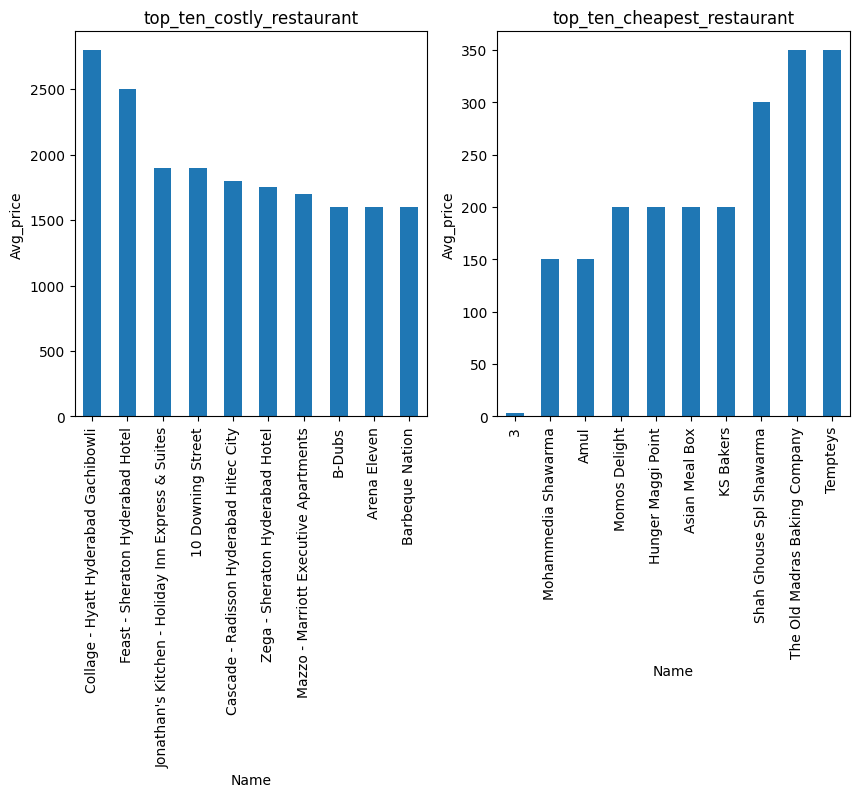

In [21]:
# Chart - 1 visualization code (Top and Bottom average cost restaurant )
#to check top ten avg cost of restaurant
top_ten_costly_restaurant=df.groupby('Name')['Cost'].mean().sort_values(ascending=False).rename("Restaurant_Name").head(10)
print(top_ten_costly_restaurant)
print('--'*30)

# to check Bottom ten avg cost of restaurant
top_ten_cheapest_restaurant=df.groupby('Name')['Cost'].mean().sort_values(ascending=True).rename("Restaurant_Name").head(10)
print(top_ten_cheapest_restaurant)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
top_ten_costly_restaurant.plot(kind='bar')
plt.title('top_ten_costly_restaurant')
plt.xlabel('Name')
plt.ylabel('Avg_price')
plt.subplot(1,2,2)
top_ten_cheapest_restaurant.plot(kind='bar')
plt.title('top_ten_cheapest_restaurant')
plt.xlabel('Name')
plt.ylabel('Avg_price')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart easily showing comparison between the avg cost of each restaurant.

##### 2. What is/are the insight(s) found from the chart?

* 'Restaurant Collage - Hyatt Hyderabad Gachibowli'  has highest average cost (2800) and Restaurant '3' has lowest average cost (3)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

#### Chart - 2

Name
AB's - Absolute Barbecues                  4.88
B-Dubs                                     4.81
3B's - Buddies, Bar & Barbecue             4.76
Paradise                                   4.70
Flechazo                                   4.66
The Indi Grill                             4.60
Zega - Sheraton Hyderabad Hotel            4.45
Over The Moon Brew Company                 4.34
Beyond Flavours                            4.28
Cascade - Radisson Hyderabad Hitec City    4.26
Name: Restaurant_rating, dtype: float64
------------------------------------------------------------
Name
Hotel Zara Hi-Fi                         2.400
Asian Meal Box                           2.580
Pakwaan Grand                            2.710
Mathura Vilas                            2.820
Behrouz Biryani                          2.825
The Chocolate Room                       2.830
Shree Santosh Dhaba Family Restaurant    2.830
KFC                                      2.850
Club Rogue                       

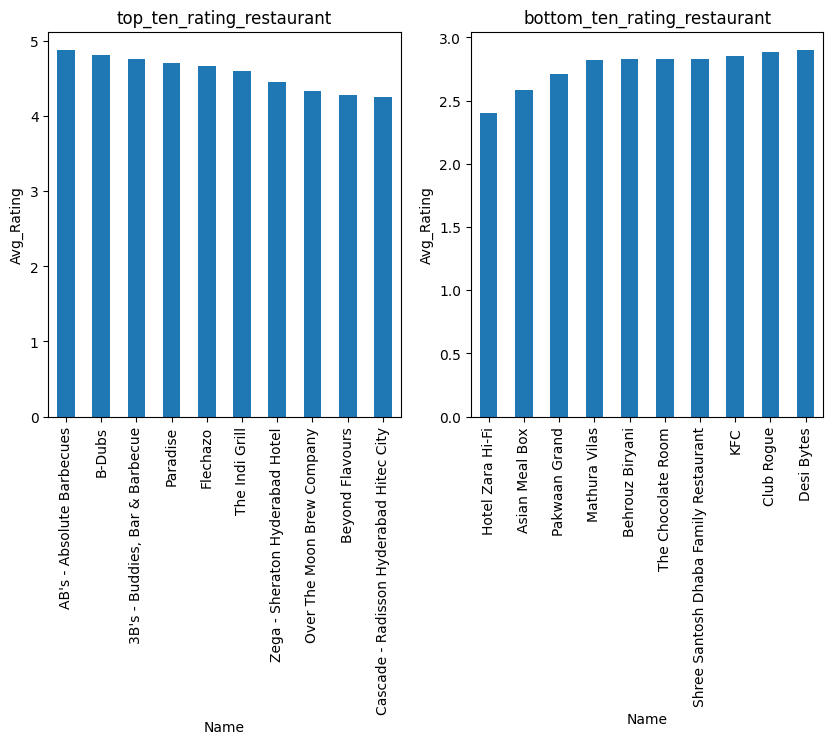

In [22]:
# Chart - 2 visualization code (highest and lowest avg rating to restaurant)

#to check top ten avg cost of restaurant
top_ten_rating_restaurant=df.groupby('Name')['Rating'].mean().sort_values(ascending=False).rename("Restaurant_rating").head(10)
print(top_ten_rating_restaurant)
print('--'*30)

# to check Bottom ten avg cost of restaurant
bottom_ten_rating_restaurant=df.groupby('Name')['Rating'].mean().sort_values(ascending=True).rename("Restaurant_rating").head(10)
print(bottom_ten_rating_restaurant)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
top_ten_rating_restaurant.plot(kind='bar')
plt.title('top_ten_rating_restaurant')
plt.xlabel('Name')
plt.ylabel('Avg_Rating')

plt.subplot(1,2,2)
bottom_ten_rating_restaurant.plot(kind='bar')
plt.title('bottom_ten_rating_restaurant')
plt.xlabel('Name')
plt.ylabel('Avg_Rating')
plt.show()


##### 1. Why did you pick the specific chart?

* It's easy to compare different output.

##### 2. What is/are the insight(s) found from the chart?

* Highest average rating for restaurant AB's - Absolute Barbecues (4.88)
* Lowest average rating for restaurant Hotel Zara Hi-Fi (2.4)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes.
* Those restaurant have lowest rating we want to check feedback and work on it.

#### Chart - 3

yearly_sales_trend --
 Year
2016      43000
2017     200750
2018    3517450
2019    4827000
Name: Cost, dtype: int64
--------------------------------------------------
monthly_sales_trend--
 Month        1         2         3          4          5         6         7   \
Year                                                                            
2016        NaN       NaN       NaN        NaN     2000.0    9000.0    3000.0   
2017     7000.0   11000.0    6000.0     4800.0    10800.0   15400.0   19600.0   
2018    27900.0    9700.0   42000.0   100500.0   151150.0  221050.0  776900.0   
2019   574100.0  625950.0  987100.0  1202450.0  1437400.0       NaN       NaN   

Month        8         9         10        11        12  
Year                                                     
2016     2000.0    1000.0    7000.0   10000.0    9000.0  
2017    26600.0   30000.0   18450.0   27700.0   23400.0  
2018   429000.0  432650.0  442350.0  402550.0  481700.0  
2019        NaN       NaN       

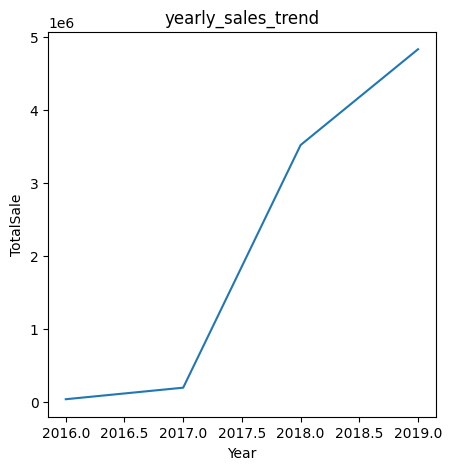

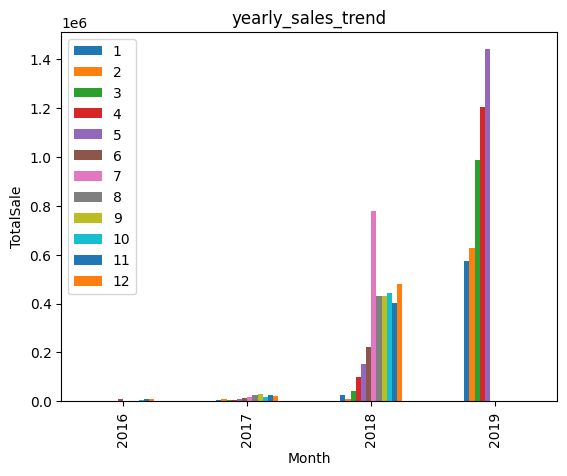

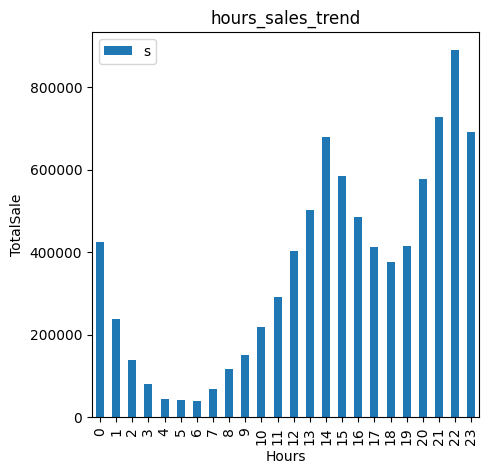

In [23]:
# Chart - 3 visualization code (Total sales with respect to year,month,day,hour)

# after checking data there is only one entry of data in year 1970 so we ignore it because its manual error
df=df[df['Year']!=1970]


yearly_sales_trend=df.groupby(['Year'])['Cost'].sum().sort_index(axis=0)
monthly_sales_trend=df.groupby(['Year','Month'])['Cost'].sum().sort_index(axis=0).unstack()
hours_sales_trend=df.groupby(['Hour'])['Cost'].sum().sort_index(axis=0)
print('yearly_sales_trend --\n',yearly_sales_trend)
print('--'*25)
print('monthly_sales_trend--\n',monthly_sales_trend)
print('--'*25)
print('hours_sales_trend--\n',hours_sales_trend)
print('--'*25)

# for yearly_sales_trend
plt.figure(figsize=(5,5))
plt.plot(yearly_sales_trend)
plt.title('yearly_sales_trend')
plt.xlabel('Year')
plt.ylabel('TotalSale')
plt.show()

# For monthly_sales_trend
monthly_sales_trend.plot(kind='bar')
plt.title('yearly_sales_trend')
plt.xlabel('Month')
plt.ylabel('TotalSale')
plt.legend(range(1,13))
plt.show()

# For hours_sales_trend
plt.figure(figsize=(5,5))
hours_sales_trend.plot(kind='bar')
plt.title('hours_sales_trend')
plt.xlabel('Hours')
plt.ylabel('TotalSale')
plt.legend('sales')
plt.show()

##### 1. Why did you pick the specific chart?

* To present data easily.

##### 2. What is/are the insight(s) found from the chart?

* Sales is increasing year on year.
* Sales is high during month april to july.
* Highest sales in night (10 PM) and then afternoon (2 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes Sales is increasing year on year and there is also showing that sale on peak point near month may and and time 10 pm and 2 pm.

#### Chart - 4

Rating
1.0    1718
1.5       9
2.0     675
2.5      19
3.0    1172
3.5      47
4.0    2340
4.5      69
5.0    3805
Name: Rating, dtype: int64


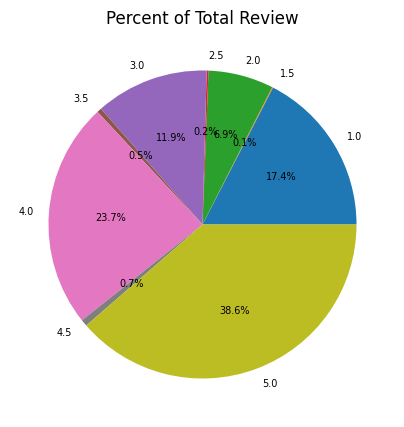

In [24]:
# Chart - 4 visualization code (Check top rating reviewer)

no_of_rating=df.groupby('Rating')['Rating'].count()
print(no_of_rating)
labels=np.linspace(1,5,9)
plt.figure(figsize=(5,5))
plt.pie(no_of_rating,labels=labels,autopct='%1.1f%%',textprops={'fontsize': 7})
plt.title('Percent of Total Review')
plt.show()


##### 1. Why did you pick the specific chart?

* To check percent of review comming from customers.

##### 2. What is/are the insight(s) found from the chart?

* There is coming 5 star review 38.6% and 1 star 17.4%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes ,Need to do study on lowest review coming customer.

#### Chart - 5

top_rate_of_dishes --
 Cuisines
Continental, Italian, North Indian, Chinese, Asian    2800.0
Modern Indian, Asian, Continental, Italian            2500.0
North Indian, Japanese, Italian, Salad, Sushi         1900.0
North Indian, Italian, Continental, Asian             1800.0
Asian, Sushi                                          1750.0
Italian, North Indian, South Indian, Asian            1700.0
North Indian, Chinese, Continental                    1650.0
Mediterranean, North Indian, Kebab, BBQ               1600.0
American                                              1600.0
North Indian, Chinese, Japanese, Sushi                1500.0
Name: Cost, dtype: float64
----------------------------------------
bottom_rate_of_dishes --
 Cuisines
Street Food, Arabian           150.000000
Momos                          200.000000
Fast Food                      200.000000
Bakery, Desserts, Fast Food    200.000000
Asian                          200.000000
Ice Cream, Desserts            250.502513
Leb

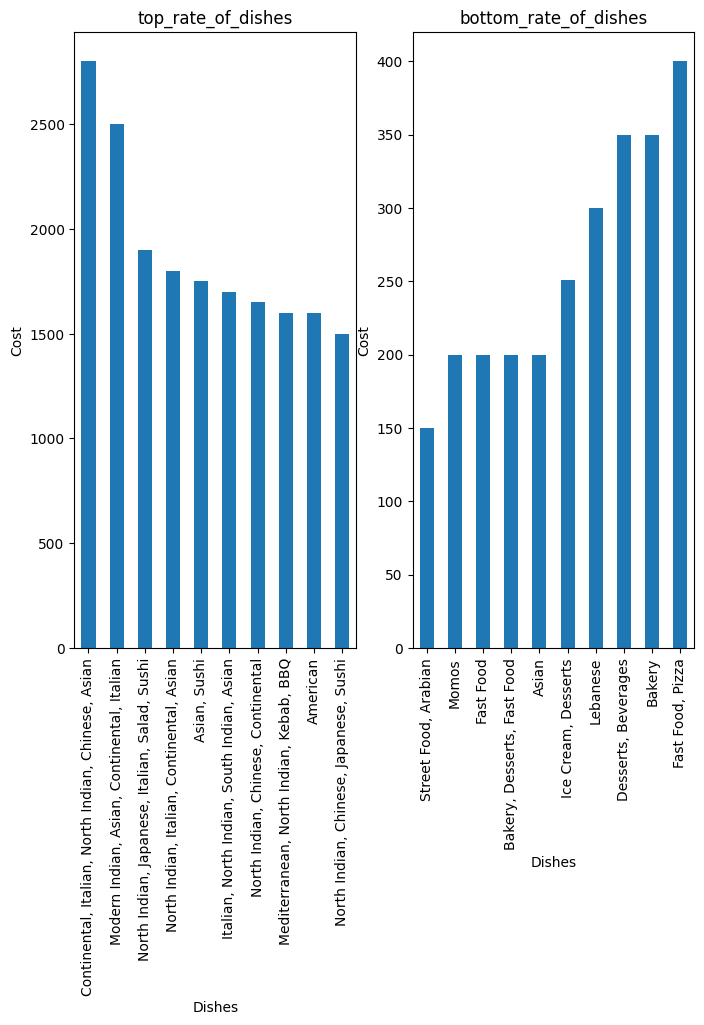

In [25]:
# Chart - 5 visualization code (Top and lowest rate of dishes)
# Tp find top_rate_of_dishes
top_rate_of_dishes=df.groupby('Cuisines')['Cost'].mean().sort_values(ascending=False).head(10)
# To find bottom_rate_of_dishes
bottom_rate_of_dishes=df.groupby('Cuisines')['Cost'].mean().sort_values(ascending=True).head(10)
print('top_rate_of_dishes --\n',top_rate_of_dishes)
print('--'*20)
print('bottom_rate_of_dishes --\n',bottom_rate_of_dishes)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
top_rate_of_dishes.plot(kind='bar')
plt.title('top_rate_of_dishes')
plt.xlabel('Dishes')
plt.ylabel('Cost')

plt.subplot(1,2,2)
bottom_rate_of_dishes.plot(kind='bar')
plt.title('bottom_rate_of_dishes')
plt.xlabel('Dishes')
plt.ylabel('Cost')
plt.show()

##### 1. Why did you pick the specific chart?

* To compare data.

##### 2. What is/are the insight(s) found from the chart?

* Highest rate of dish - Continental, Italian, North Indian, Chinese, Asian    (2800.0)

* Lowest rate of dish - Street Food, Arabian (150.0)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes

#### Chart - 6

American, Fast Food, Salad, Burger                           77
Fast Food, Pizza                                             99
Bakery                                                       99
North Indian, Chinese, Continental, Biryani                  99
North Indian, Chinese, Seafood, Biryani, Hyderabadi          99
Chinese, Thai, Indonesian, Asian                            100
Biryani, North Indian, Chinese, Seafood, Beverages          100
Asian, Continental, North Indian, Chinese, Mediterranean    100
Seafood, Goan, North Indian, Continental, Asian             100
Healthy Food, North Indian, Continental, South Indian       100
Name: Cuisines, dtype: int64



North Indian, Chinese                           397
North Indian                                    300
Biryani, North Indian, Chinese                  200
North Indian, Chinese, Biryani                  200
North Indian, Chinese, Continental              200
South Indian, North Indian, Chinese             200
Ice Cream, Desse

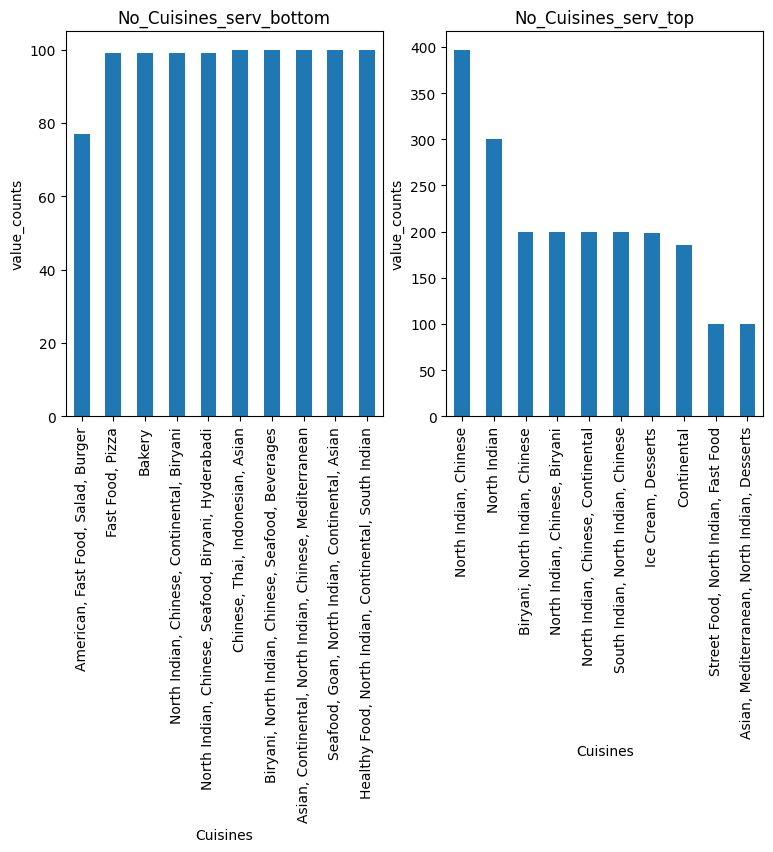

In [26]:
# Chart - 6 visualization code (Check no of Cuisines serv in different restaurants)

No_Cuisines_serv_bottom = df['Cuisines'].value_counts().sort_values(ascending=True).head(10)
No_Cuisines_serv_top = df['Cuisines'].value_counts().sort_values(ascending=False).head(10)
print(No_Cuisines_serv_bottom)
print('\n\n')
print(No_Cuisines_serv_top)
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
No_Cuisines_serv_bottom.plot(kind='bar')
plt.title('No_Cuisines_serv_bottom')
plt.xlabel('Cuisines')
plt.ylabel('value_counts')
plt.subplot(1,2,2)
No_Cuisines_serv_top.plot(kind='bar')
plt.title('No_Cuisines_serv_top')
plt.xlabel('Cuisines')
plt.ylabel('value_counts')
plt.show()

##### 1. Why did you pick the specific chart?

* To compare data.

##### 2. What is/are the insight(s) found from the chart?

* Lowest time serv Cuisines is  "American, Fast Food, Salad, Burger" (77)
* Highest time serv Cuisines is "North Indian, Chinese" (397)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes

#### Chart - 7

In [27]:
df.head(1)

Name                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings           Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Rusha Chakraborty   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   

                 Metadata                Time  Pictures  Year  Day  Month  \
0  1 Review , 2 Followers 2019-05-25 15:54:00         0  2019   25      5   

   Hour  
0    15

In [28]:
# from os import path
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# #word cloud for user rating review
# def func_select_Category(category_name,column_of_choice):
#   df_word_cloud = df[['cluster',column_of_choice]].dropna()
#   df_word_cloud = df_word_cloud[df_word_cloud['cluster']==category_name]
#   text = " ".join(word for word in df_word_cloud[column_of_choice])
#   # Create stopword list:
#   stopwords = set(STOPWORDS)
#   # Generate a word cloud image
#   wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
#   # Display the generated image:
#   # the matplotlib way:
#   plt.imshow(wordcloud, interpolation='bilinear')
#   plt.axis("off")
#   plt.show()

# for i in range(9):
#   func_select_Category(i,'Cuisines')

#### Chart - 7 - Correlation Heatmap

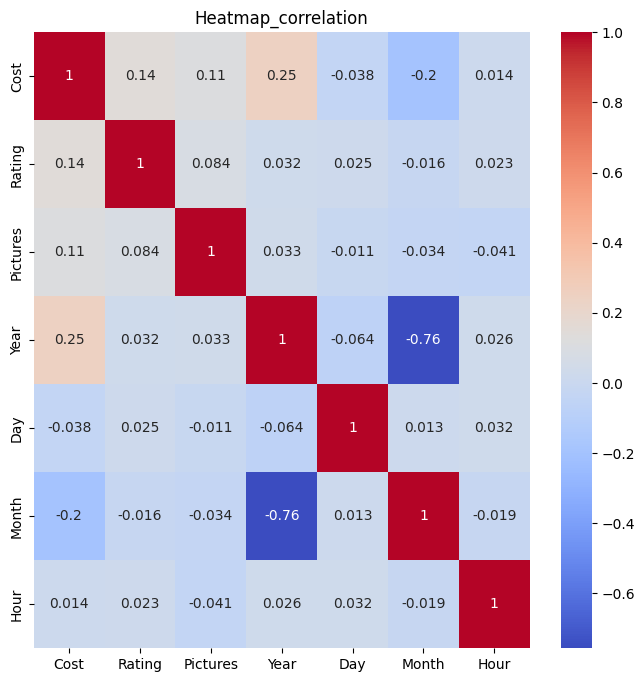

In [29]:
# Correlation Heatmap visualization code

df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap_correlation')
plt.show()

##### 1. Why did you pick the specific chart?

* To visualize correlation between each variable easily.

##### 2. What is/are the insight(s) found from the chart?

* There is showing that all variable correlation between each other.

#### Chart - 8 - Pair Plot

<Figure size 500x500 with 0 Axes>

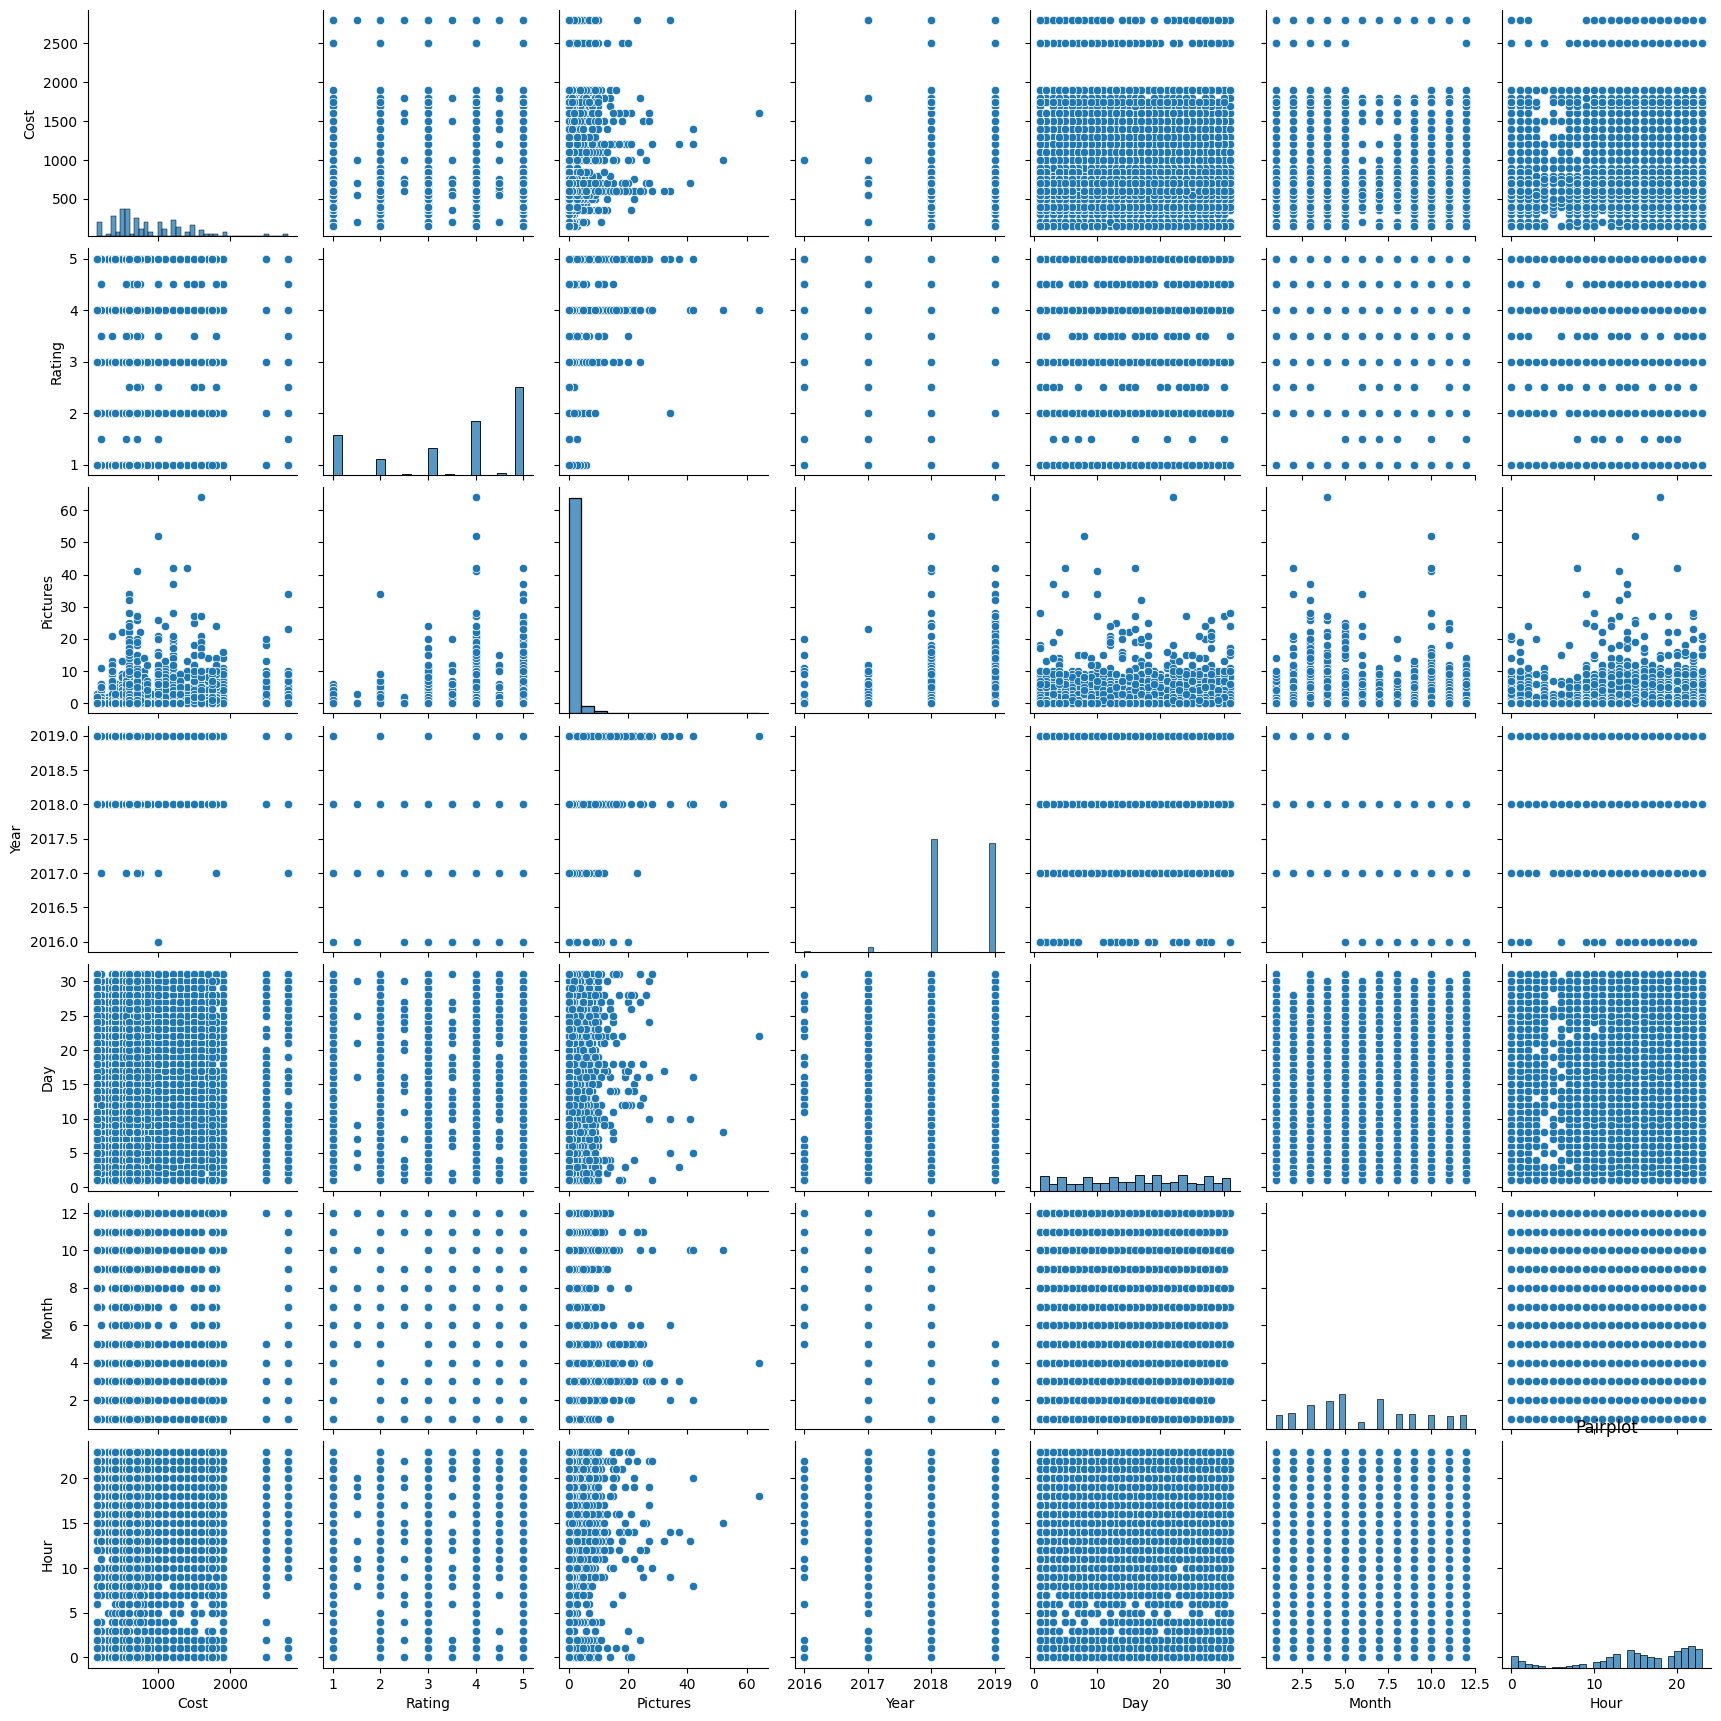

In [30]:
# Pair Plot visualization code
plt.figure(figsize=(5,5))
sns.pairplot(df)
plt.title('Pairplot')
plt.show()

##### 1. Why did you pick the specific chart?

* To show data distribution.

##### 2. What is/are the insight(s) found from the chart?

* To get information about data distribution.

#RFM - Recency Frequency Monetary model Create

In [58]:
# Create new Datasets.
rfm=df[['Reviewer','Cost','Time']]
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
Latest_Date = rfm['Time'].max()

rfm_df = rfm.groupby('Reviewer').agg({'Time': lambda x: (Latest_Date - x.max()).days, 'Reviewer': lambda x: len(x), 'Cost': lambda x: x.sum()})

rfm_df.rename(columns={'Time': 'Recency',
                         'Reviewer': 'Frequency',
                         'Cost': 'Monetary'}, inplace=True)

In [68]:
rfm_df.reset_index().head()

Reviewer  Recency  Frequency  Monetary
0                    #FOODPORN       10          1      1750
1          #chloesviews // CAH       15          1       500
2                         $ign       74          1      1400
3                     4mybanti       65          1      1400
4  @FuloriBinaChutneyKaiseBani      992          1      1000

count    7393.000000
mean      171.832003
std       147.873184
min         0.000000
25%        44.000000
50%       144.000000
75%       288.000000
max      1089.000000
Name: Recency, dtype: float64


[]

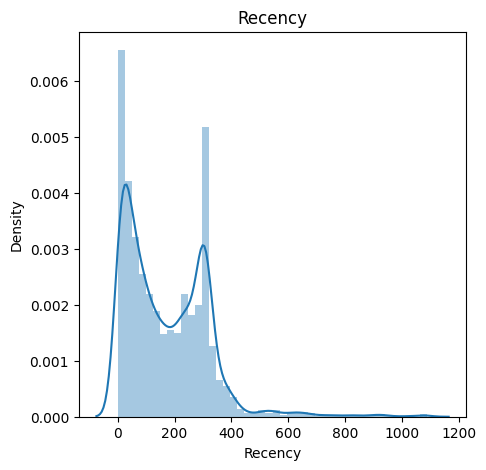

In [77]:
#Descriptive Statistics (Recency)
print(rfm_df.Recency.describe())

#Recency distribution plot
import seaborn as sns
plt.figure(figsize=(5,5))
x = rfm_df['Recency']

sns.distplot(x)
plt.title('Recency')
plt.plot()

count    7393.000000
mean        1.332882
std         0.949466
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        13.000000
Name: Frequency, dtype: float64


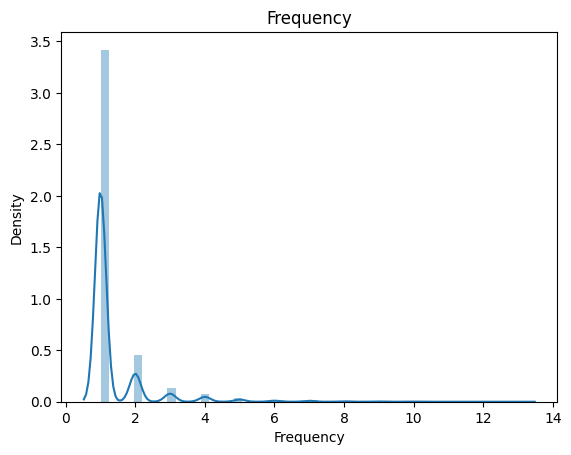

In [78]:
#Descriptive Statistics (Frequency)
print(rfm_df.Frequency.describe())

#Frequency distribution plot\
import seaborn as sns
x = rfm_df['Frequency']
sns.distplot(x)
plt.title('Frequency')
plt.show()

count     7393.000000
mean      1161.666441
std       1025.275229
min        150.000000
25%        500.000000
50%        800.000000
75%       1500.000000
max      12550.000000
Name: Monetary, dtype: float64


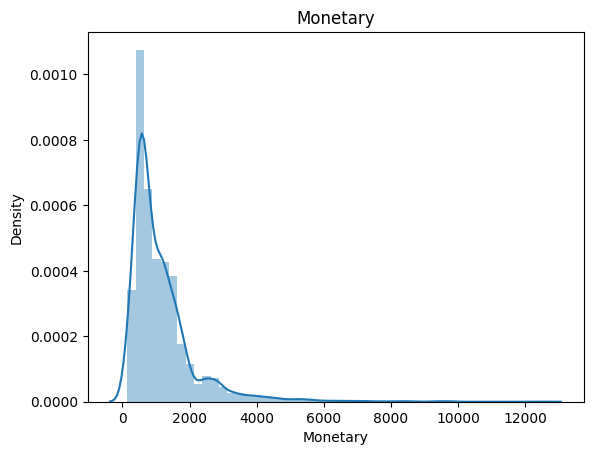

In [80]:
#Descriptive Statistics (Monetary)
print(rfm_df.Monetary.describe())

#Monateray distribution plot
import seaborn as sns
x = rfm_df['Monetary']

sns.distplot(x)
plt.title('Monetary')
plt.show()

In [83]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [84]:
quantiles

{'Recency': {0.25: 44.0, 0.5: 144.0, 0.75: 288.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 500.0, 0.5: 800.0, 0.75: 1500.0}}

In [85]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [86]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
Reviewer                                                          
#FOODPORN                         10          1      1750  1  4  1
#chloesviews // CAH               15          1       500  1  4  4
$ign                              74          1      1400  2  4  2
4mybanti                          65          1      1400  2  4  2
@FuloriBinaChutneyKaiseBani      992          1      1000  4  4  2

In [88]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  \
Reviewer                                                                      
#FOODPORN                         10          1      1750  1  4  1      141   
#chloesviews // CAH               15          1       500  1  4  4      144   
$ign                              74          1      1400  2  4  2      242   
4mybanti                          65          1      1400  2  4  2      242   
@FuloriBinaChutneyKaiseBani      992          1      1000  4  4  2      442   

                             RFMScore  
Reviewer                               
#FOODPORN                           6  
#chloesviews // CAH                 9  
$ign                                8  
4mybanti                            8  
@FuloriBinaChutneyKaiseBani        10

In [90]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

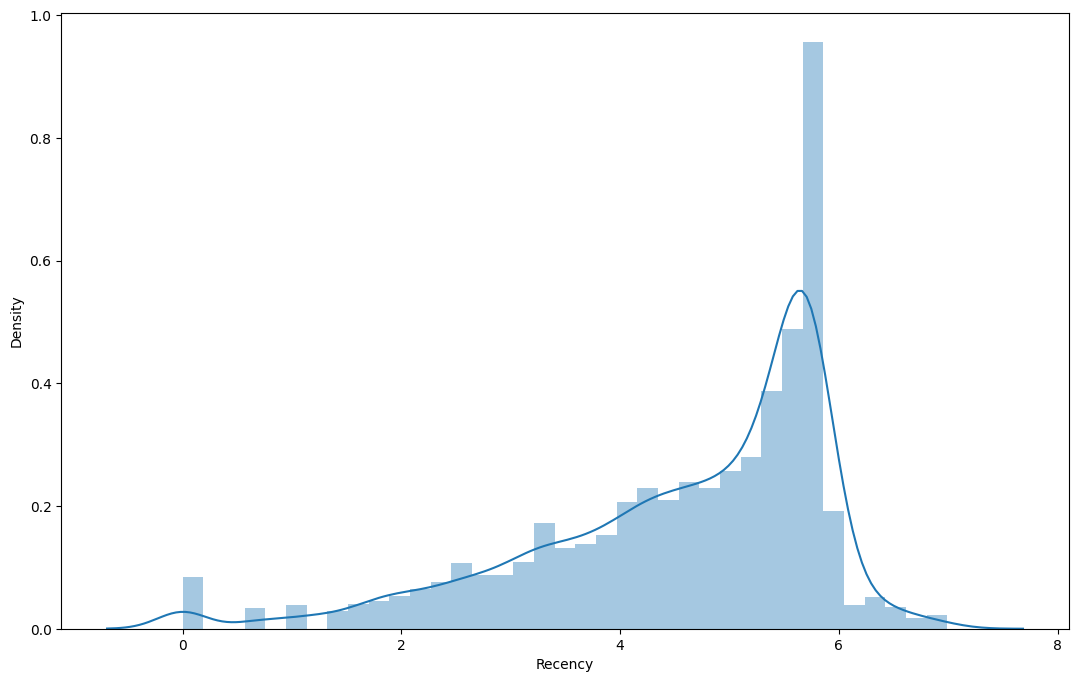

In [92]:

#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)
plt.show()

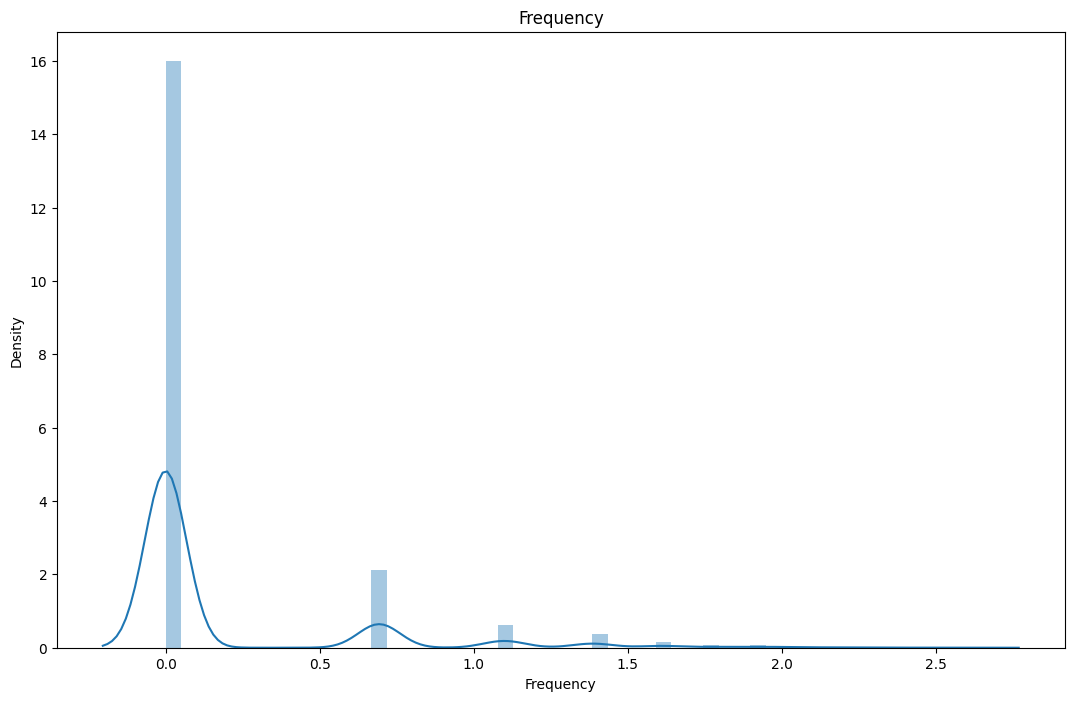

In [93]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)
plt.title('Frequency')
plt.show()

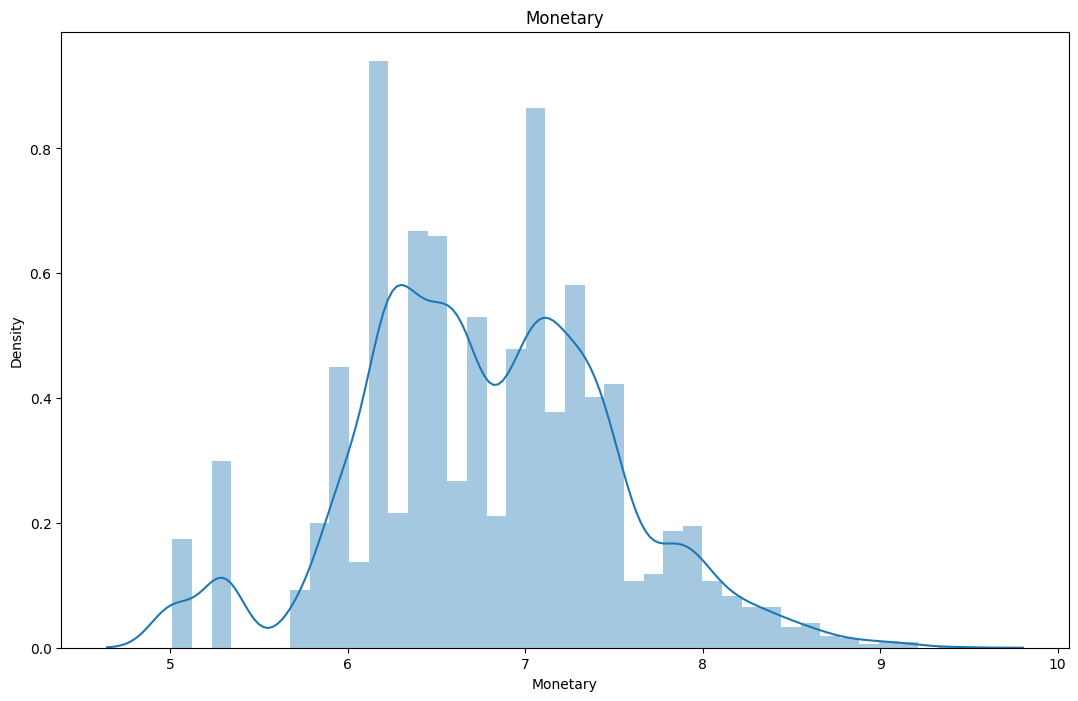

In [94]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)
plt.title('Monetary')
plt.show()

In [96]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [97]:
rfm_df

Recency  Frequency  Monetary  R  F  M RFMGroup  \
Reviewer                                                                      
#FOODPORN                         10          1      1750  1  4  1      141   
#chloesviews // CAH               15          1       500  1  4  4      144   
$ign                              74          1      1400  2  4  2      242   
4mybanti                          65          1      1400  2  4  2      242   
@FuloriBinaChutneyKaiseBani      992          1      1000  4  4  2      442   
...                              ...        ...       ... .. .. ..      ...   
ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ                   328          1       650  4  4  3      443   
ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ                      55          1       900  2  4  2      242   
✌️✌️Reddy 🥂🍽️                    120          1      1900  2  4  1      241   
✔️ Sonu                           72          2      1400  2  1  2      212   
🍛🍲🥗                              138          2      1000  2  1  2      212   

                             RFMScore  Recency_log  Frequency_log  \
Reviewer                                                            
#FOODPORN                           6     2.302585       0.000000   
#chloesviews // CAH                 9     2.708050       0.000000   
$ign                                8     4.304065       0.000000   
4mybanti                            8     4.174387       0.000000   
@FuloriBinaChutneyKaiseBani        10     6.899723       0.000000   
...                               ...          ...            ...   
ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ                     11     5.793014       0.000000   
ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ                        8     4.007333       0.000000   
✌️✌️Reddy 🥂🍽️                       7     4.787492       0.000000   
✔️ Sonu                             5     4.276666       0.693147   
🍛🍲🥗                                 5     4.927254       0.693147   

                             Monetary_log  
Reviewer                                   
#FOODPORN                        7.467371  
#chloesviews // CAH              6.214608  
$ign                             7.244228  
4mybanti                         7.244228  
@FuloriBinaChutneyKaiseBani      6.907755  
...                                   ...  
ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ                   6.476972  
ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ                     6.802395  
✌️✌️Reddy 🥂🍽️                    7.549609  
✔️ Sonu                          7.244228  
🍛🍲🥗                              6.907755  

[7393 rows x 11 columns]

###**Applying Silhouette Score Method on Recency and Monetary**

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4417678939246642
For n_clusters = 3, silhouette score is 0.4263996978383812
For n_clusters = 4, silhouette score is 0.35885401034004577
For n_clusters = 5, silhouette score is 0.3485183668609018
For n_clusters = 6, silhouette score is 0.4085749468165403
For n_clusters = 7, silhouette score is 0.41573371398359005
For n_clusters = 8, silhouette score is 0.41157057418108656
For n_clusters = 9, silhouette score is 0.4061802721490387
For n_clusters = 10, silhouette score is 0.3725506390132886
For n_clusters = 11, silhouette score is 0.3812363261270701
For n_clusters = 12, silhouette score is 0.38136369548400406
For n_clusters = 13, silhouette score is 0.37297793845270416
For n_clusters = 14, silhouette score is 0.3822538881943269
For n_clusters = 15, silhouette score is 0.3820965351664872


###**Applying Elbow Method on Recency and Monetary**

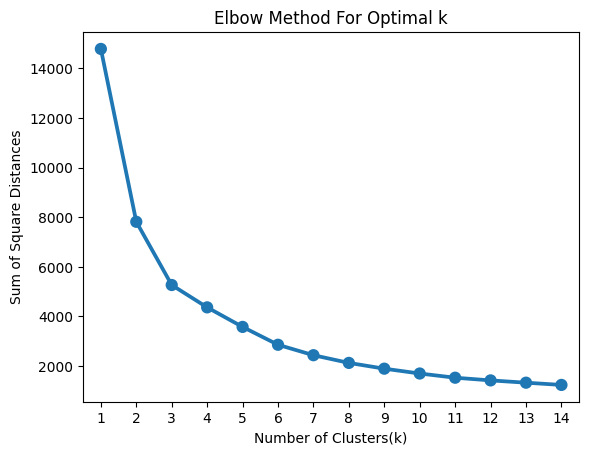

In [99]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

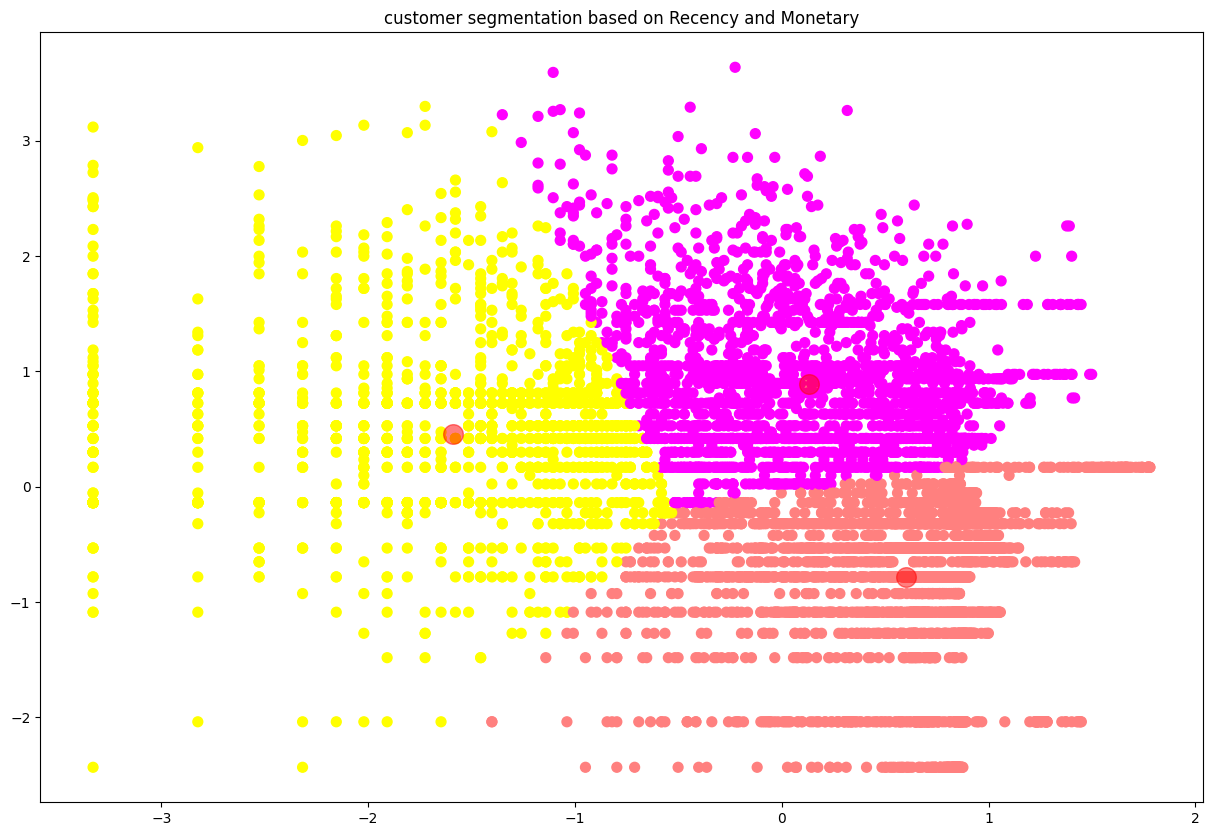

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###**Applying DBSCAN  on Recency and Monetary**

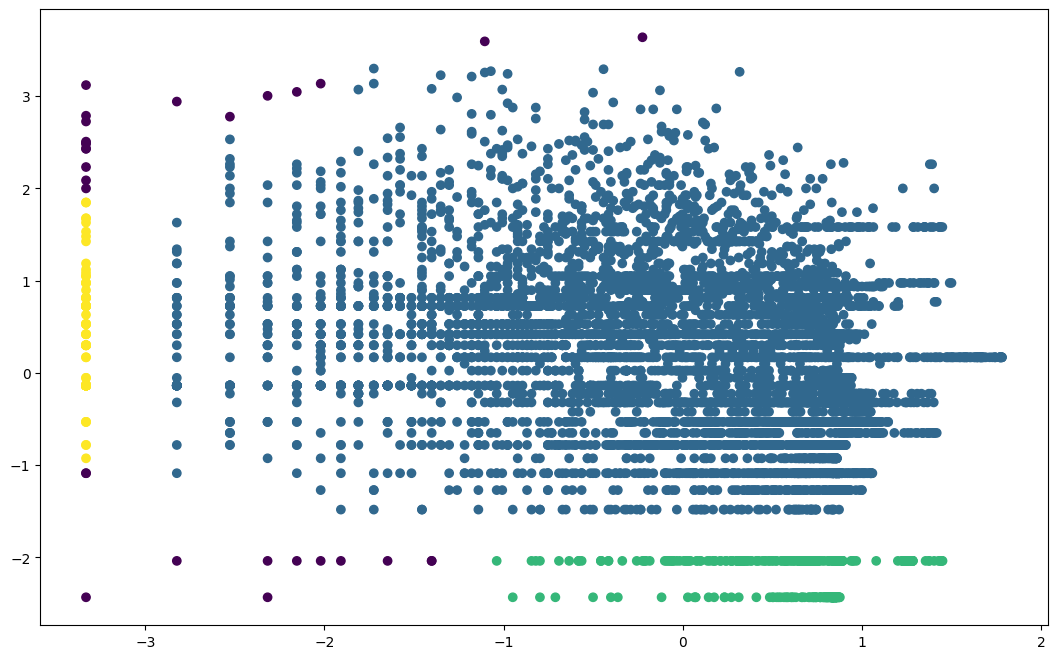

In [102]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

###**Applying silhouette Score  Method on Frquency and Monetary**

In [103]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6494203685928057
For n_clusters = 3, silhouette score is 0.5390525991081592
For n_clusters = 4, silhouette score is 0.5596148868054004
For n_clusters = 5, silhouette score is 0.6046250425657336
For n_clusters = 6, silhouette score is 0.5680800022349379
For n_clusters = 7, silhouette score is 0.5660445648573591
For n_clusters = 8, silhouette score is 0.5716966017399285
For n_clusters = 9, silhouette score is 0.583717896431734
For n_clusters = 10, silhouette score is 0.5802532057173271
For n_clusters = 11, silhouette score is 0.5976279800071874
For n_clusters = 12, silhouette score is 0.6014272451772805
For n_clusters = 13, silhouette score is 0.6043360135728304
For n_clusters = 14, silhouette score is 0.624399030921509
For n_clusters = 15, silhouette score is 0.6214897446108525


###**Applying Elbow Method on Frequency and Monetary**

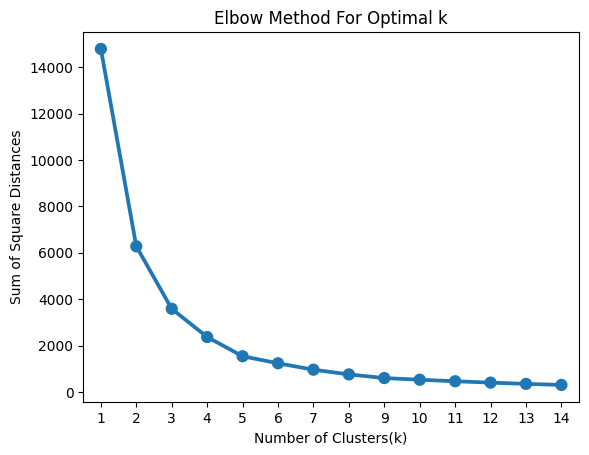

In [104]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [105]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

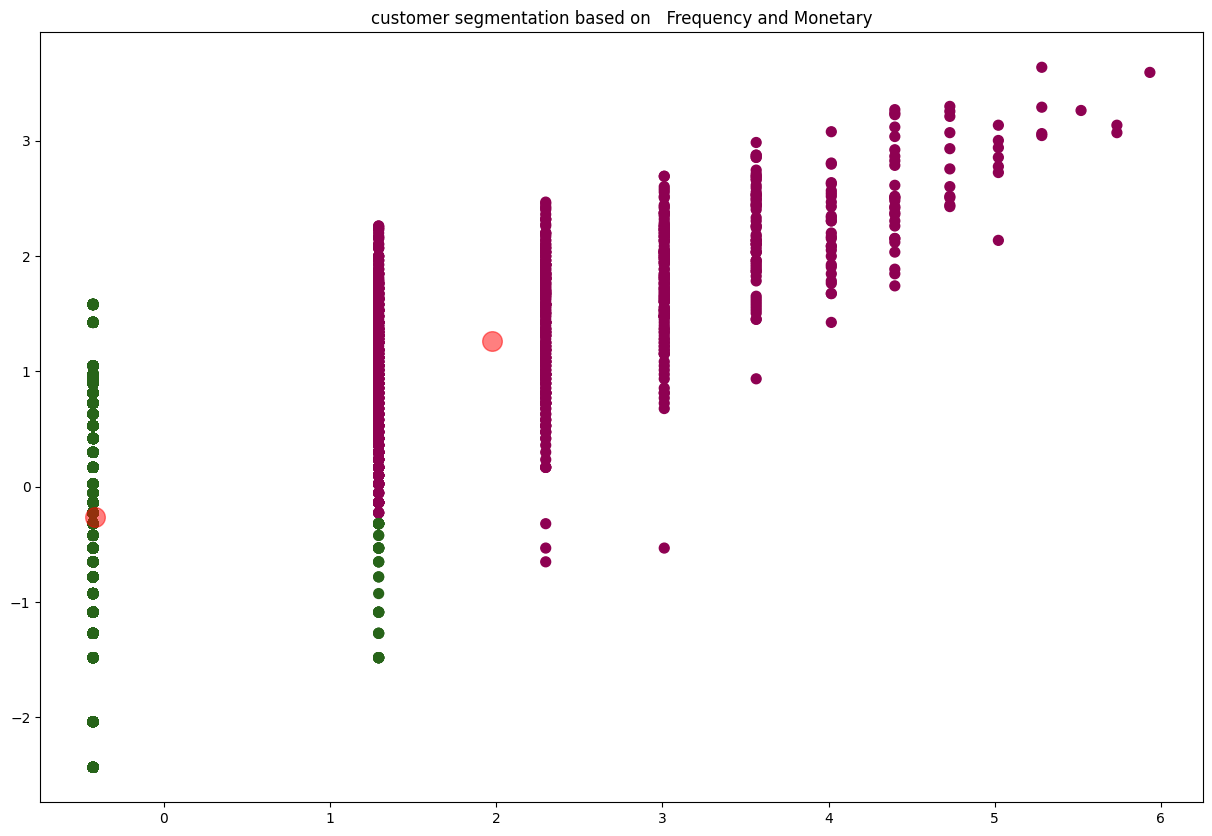

In [106]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###**Applying DBSCAN to Method on Frquency and Monetary**

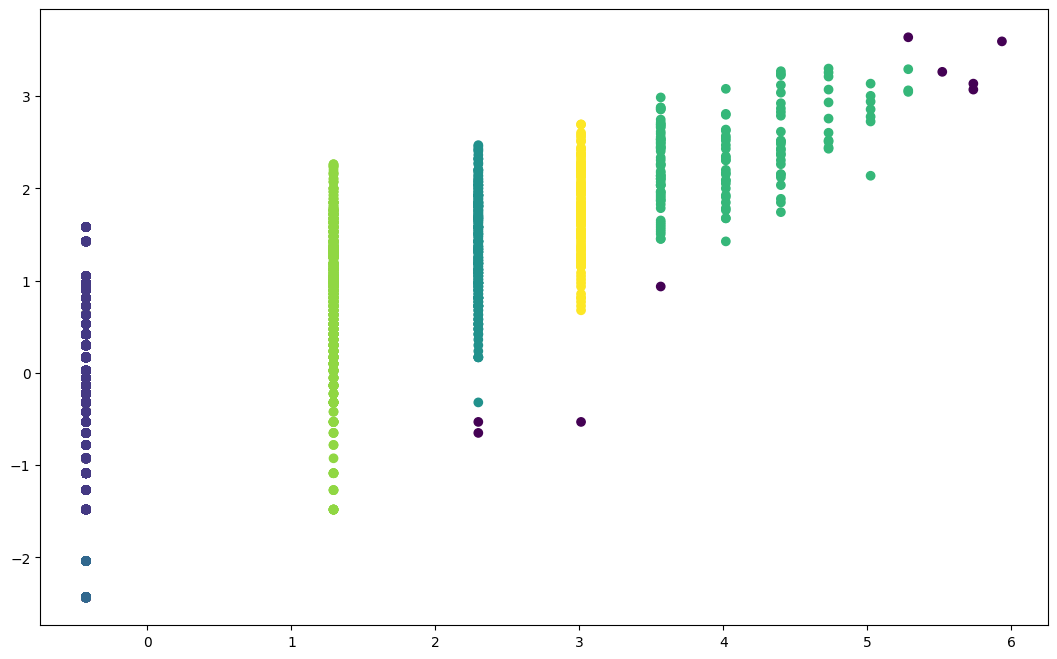

In [107]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

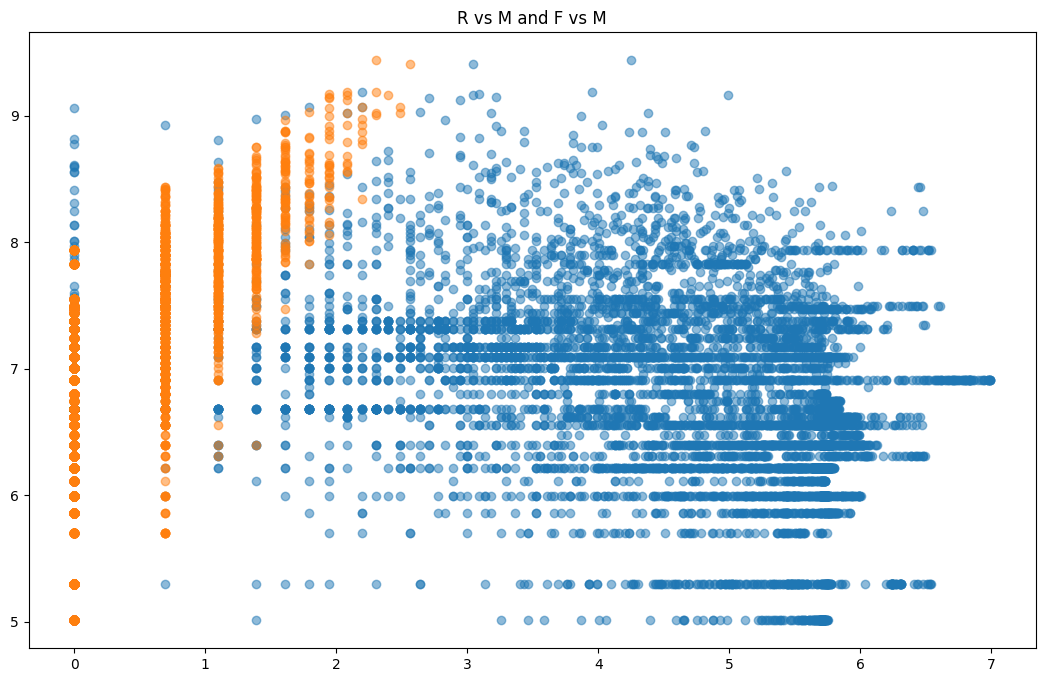

In [109]:
# we see that ,Customers are well separate when we cluster them by Frequency and Monetary
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

###**Applying Silhouette  Method on Recency ,Frequency and Monetary**

In [110]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.4963864834931328
For n_clusters = 3 The average silhouette_score is : 0.4372687145914524
For n_clusters = 4 The average silhouette_score is : 0.3869924291064478
For n_clusters = 5 The average silhouette_score is : 0.40071460668865705
For n_clusters = 6 The average silhouette_score is : 0.3968447957187201
For n_clusters = 7 The average silhouette_score is : 0.4142418465436173
For n_clusters = 8 The average silhouette_score is : 0.4149398799945091
For n_clusters = 9 The average silhouette_score is : 0.4133531539864166
For n_clusters = 10 The average silhouette_score is : 0.41830084936637957
For n_clusters = 11 The average silhouette_score is : 0.37862346590622403
For n_clusters = 12 The average silhouette_score is : 0.40776980837107557
For n_clusters = 13 The average silhouette_score is : 0.37147626551265084
For n_clusters = 14 The average silhouette_score is : 0.37847134633823365
For n_clusters = 15 The average silhouette_score is :

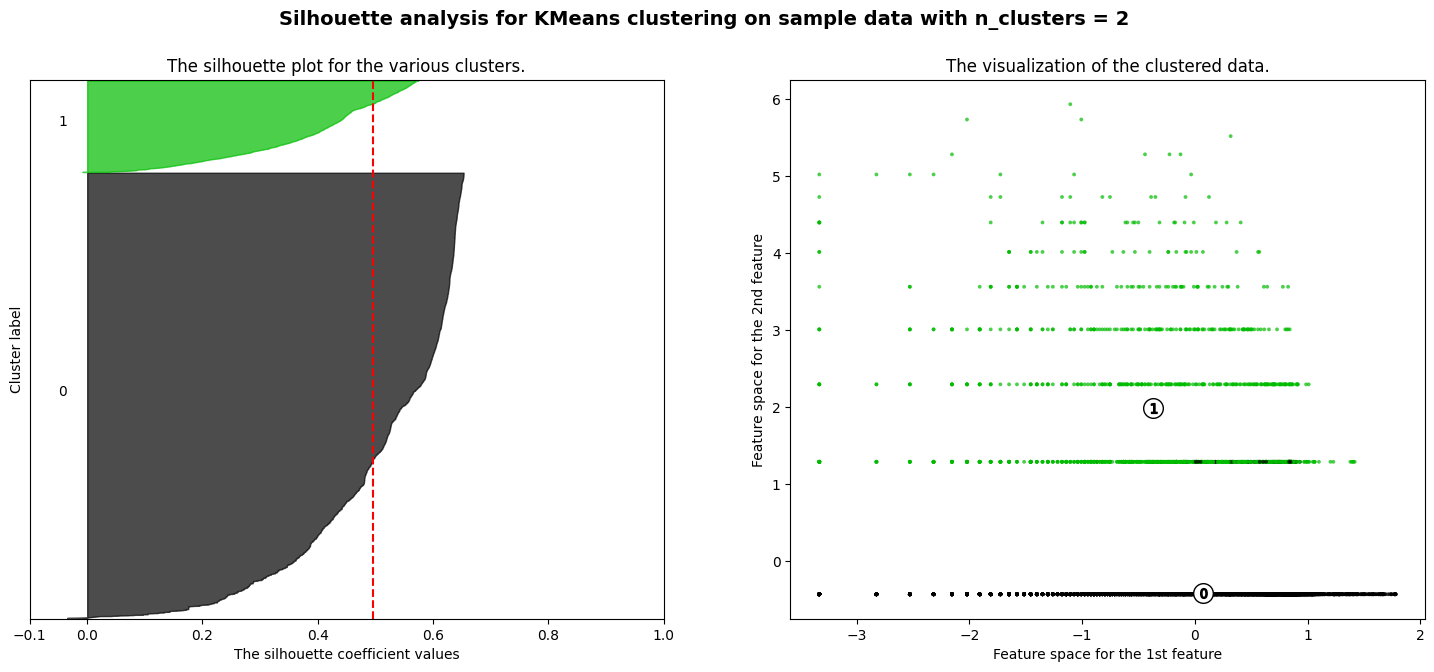

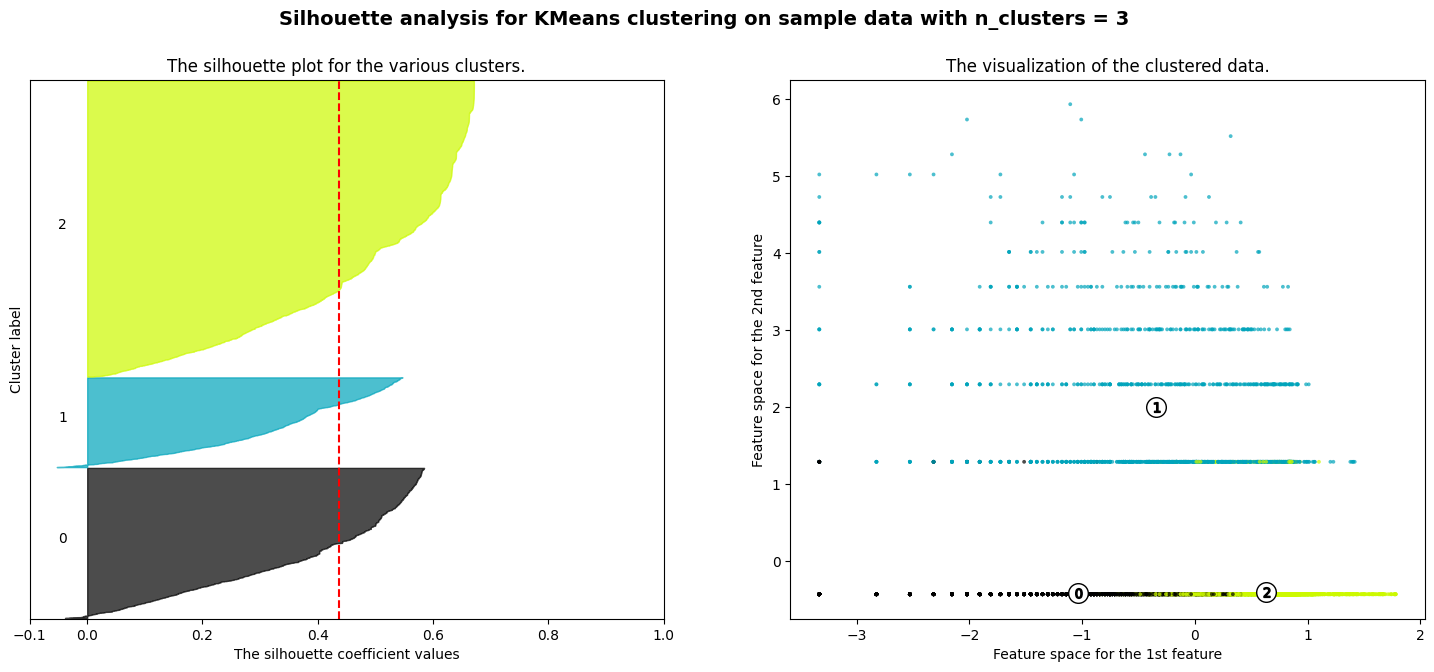

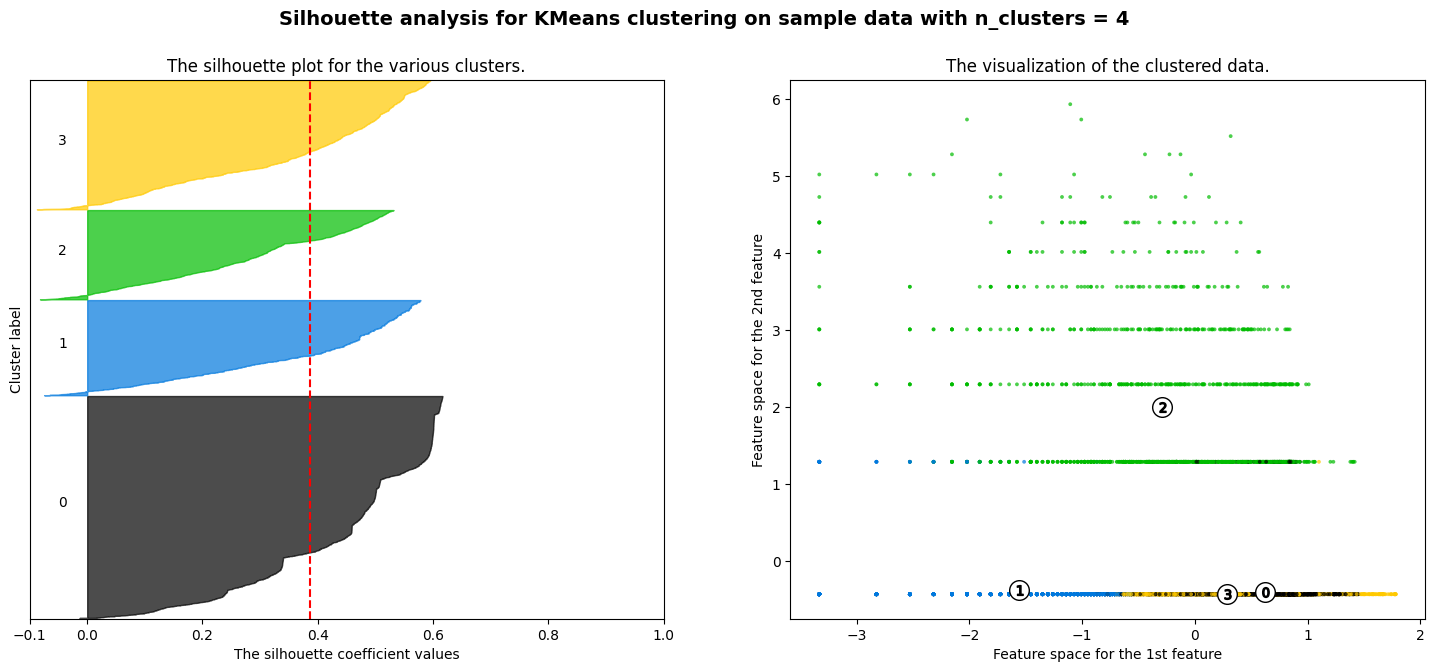

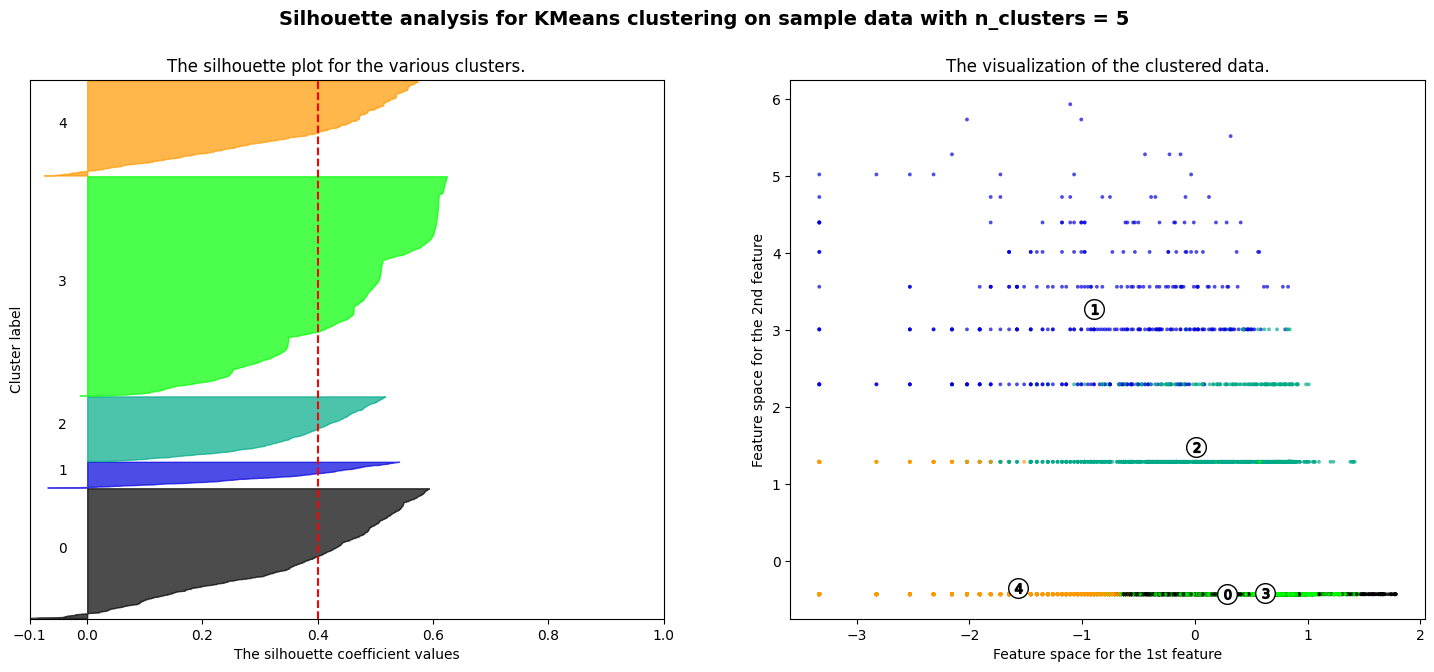

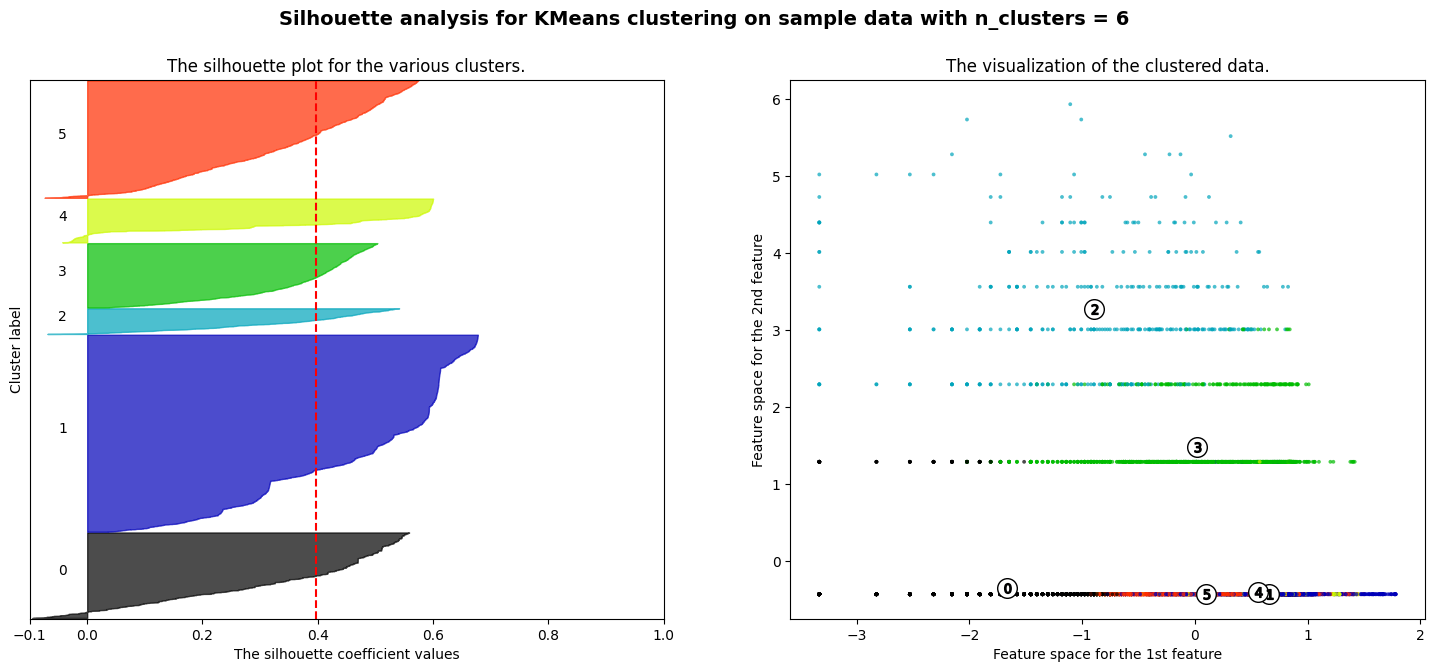

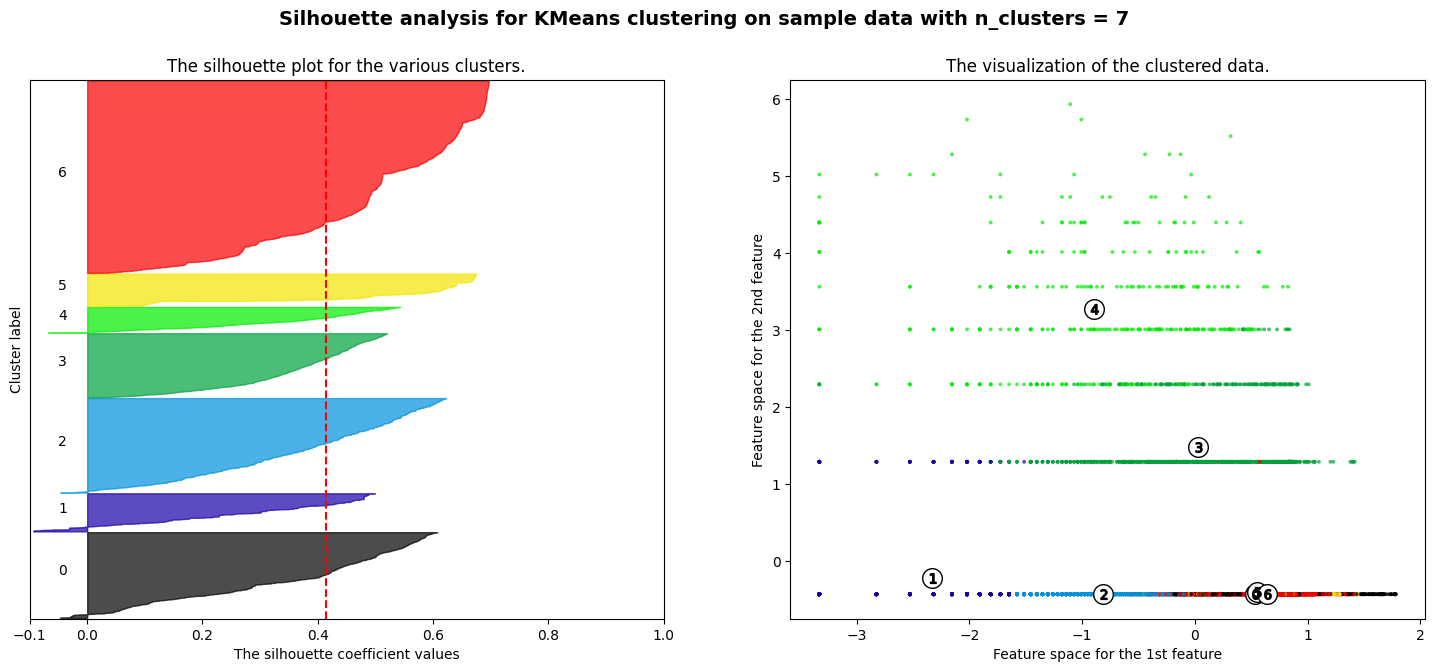

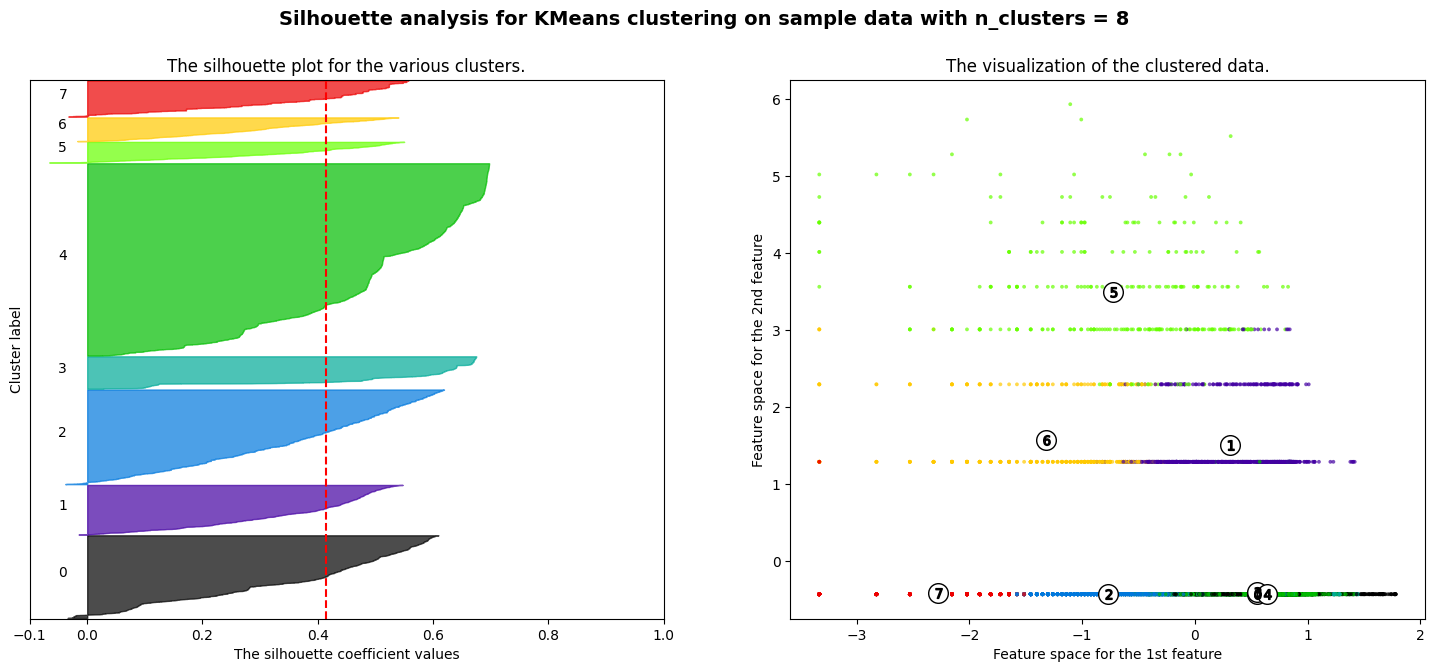

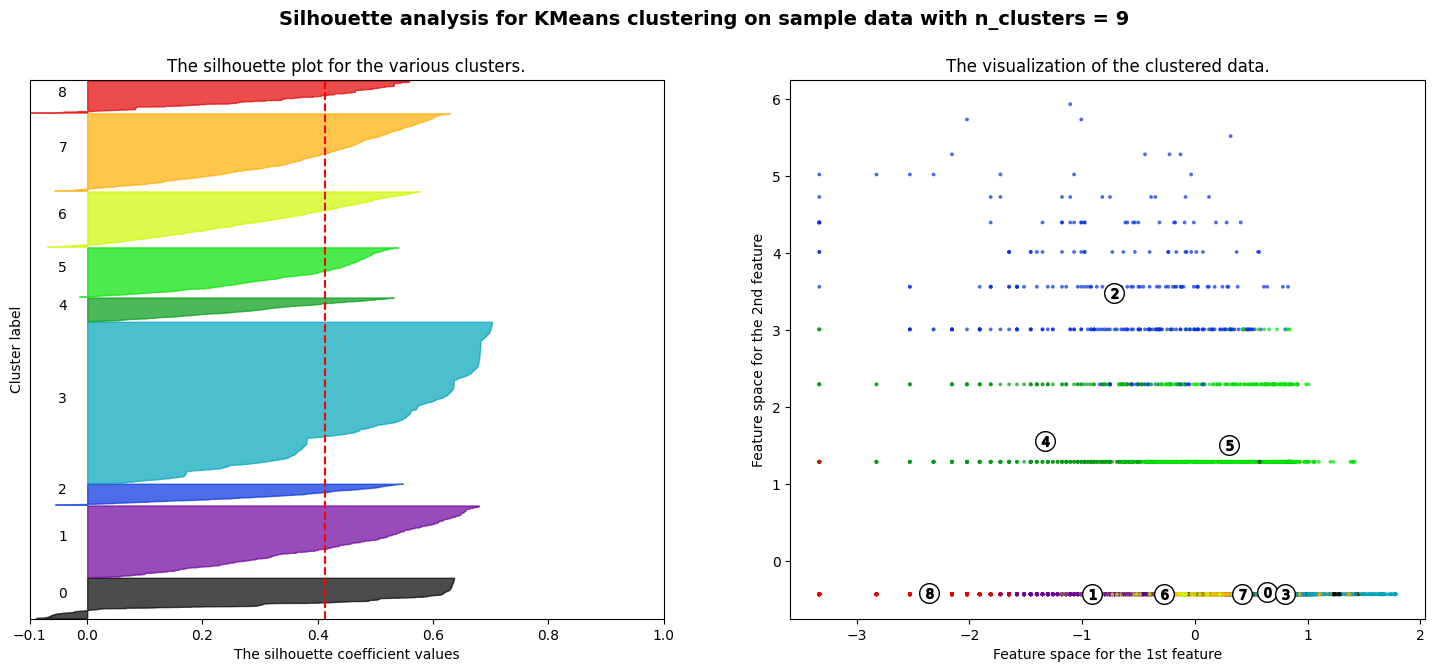

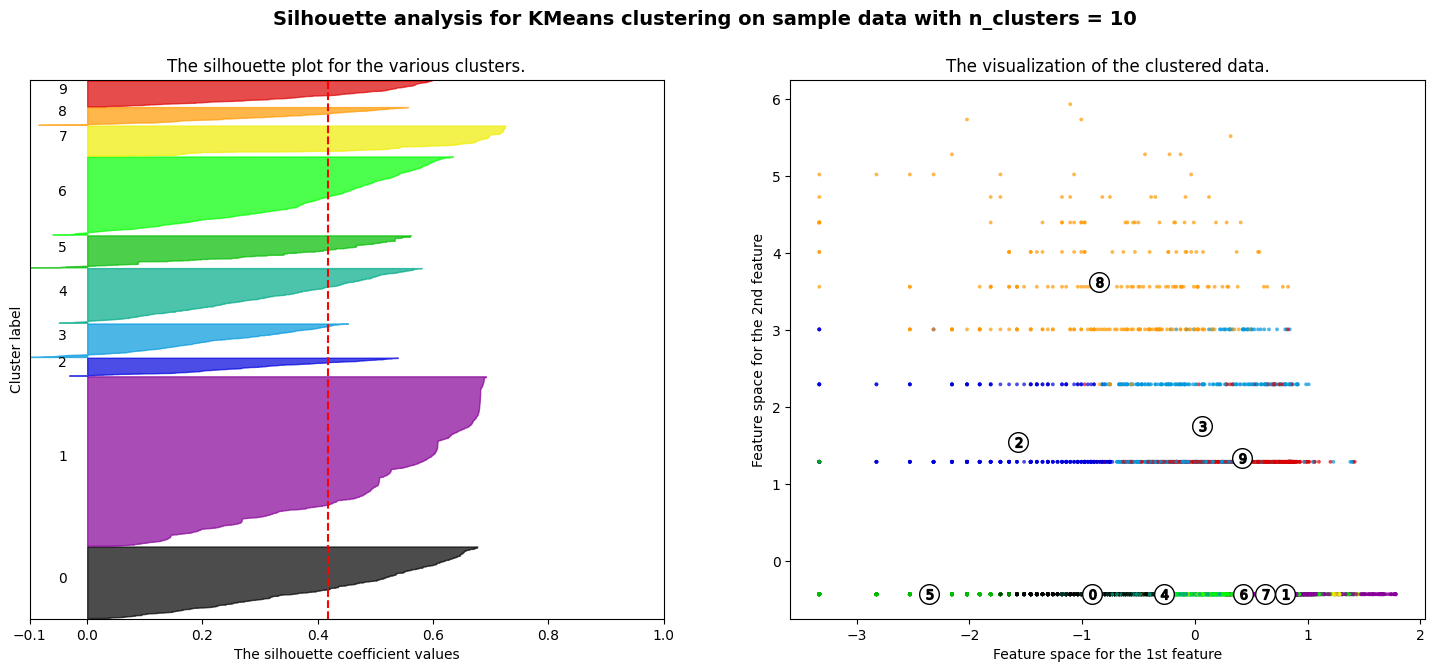

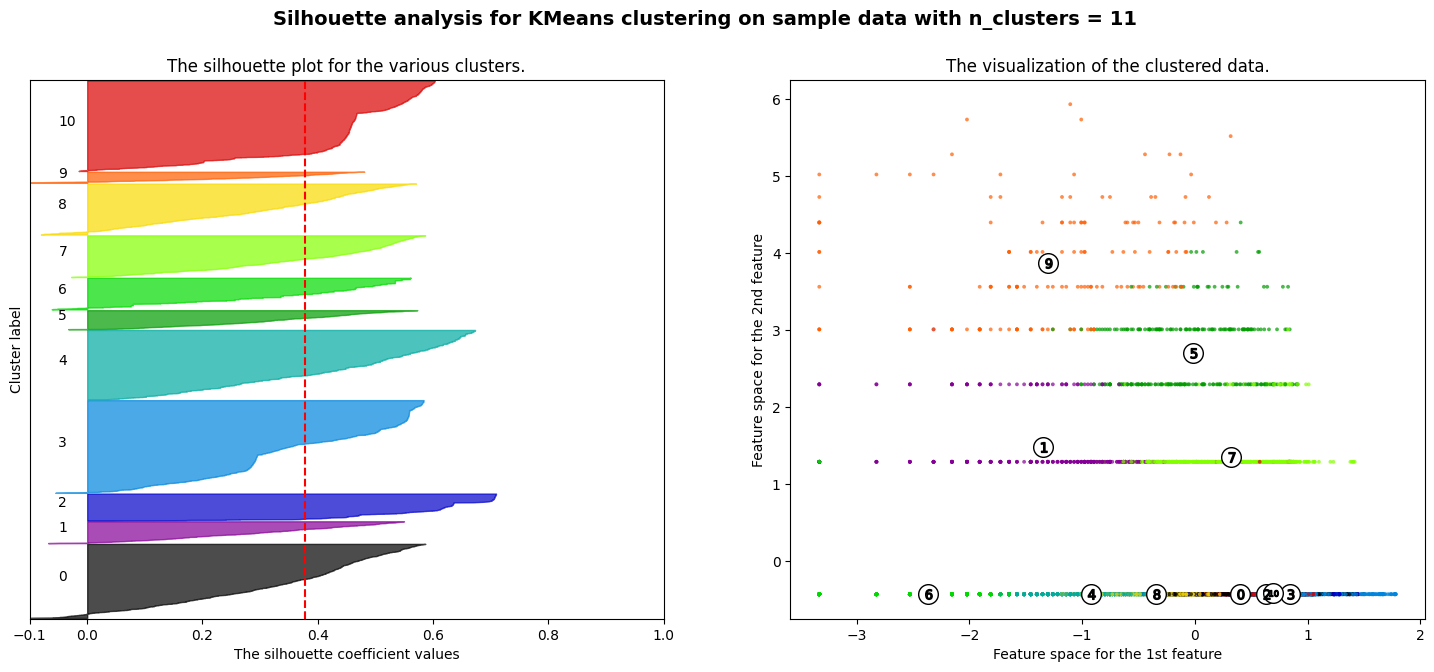

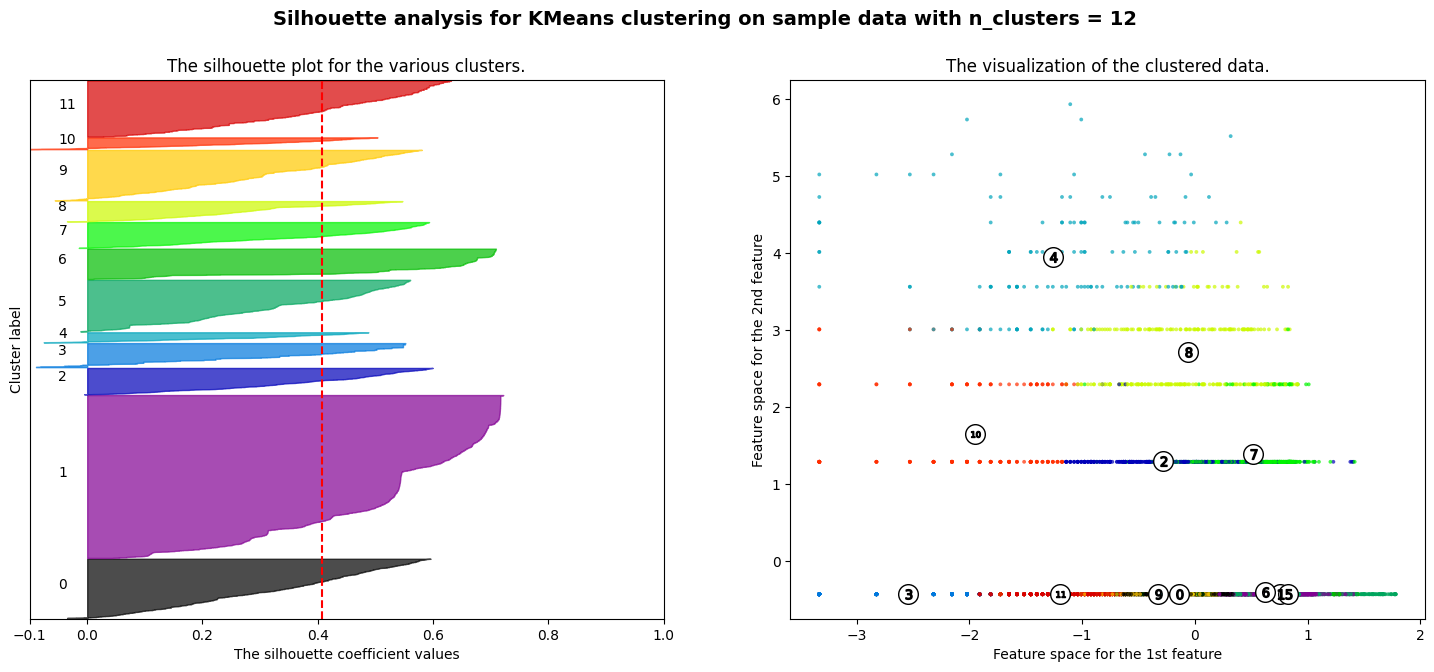

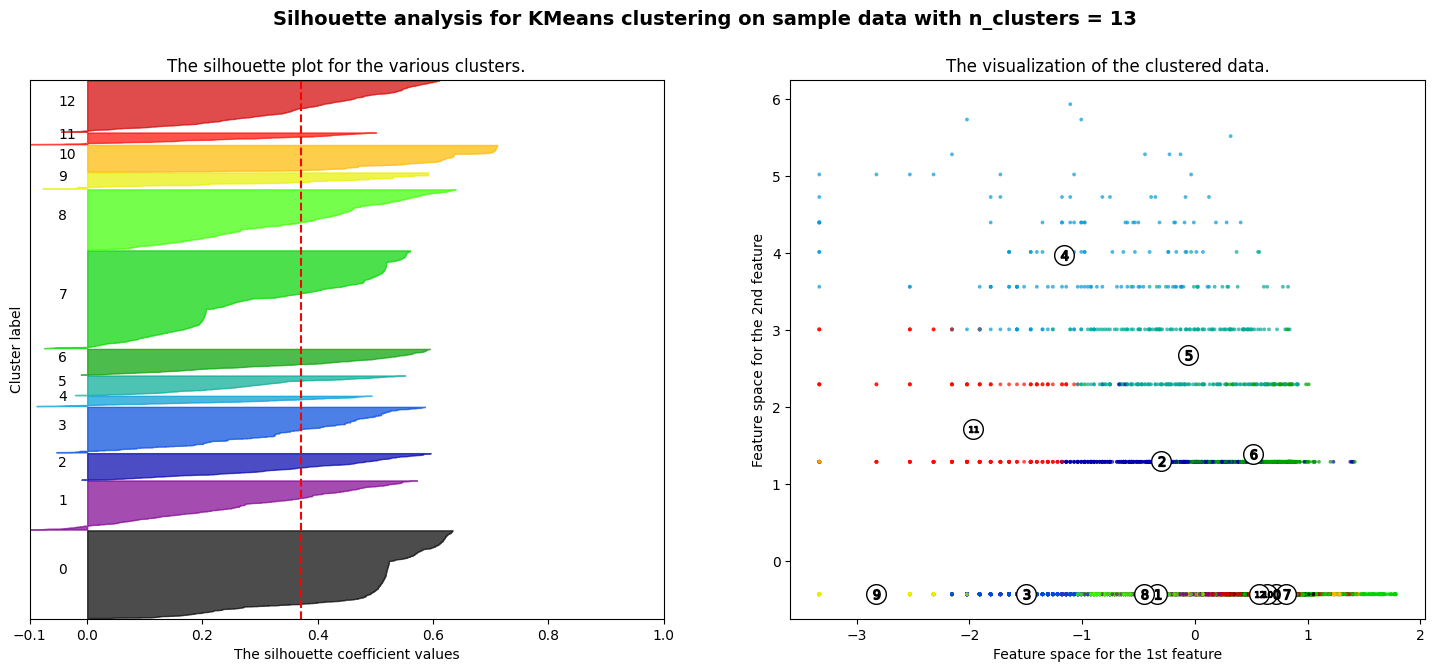

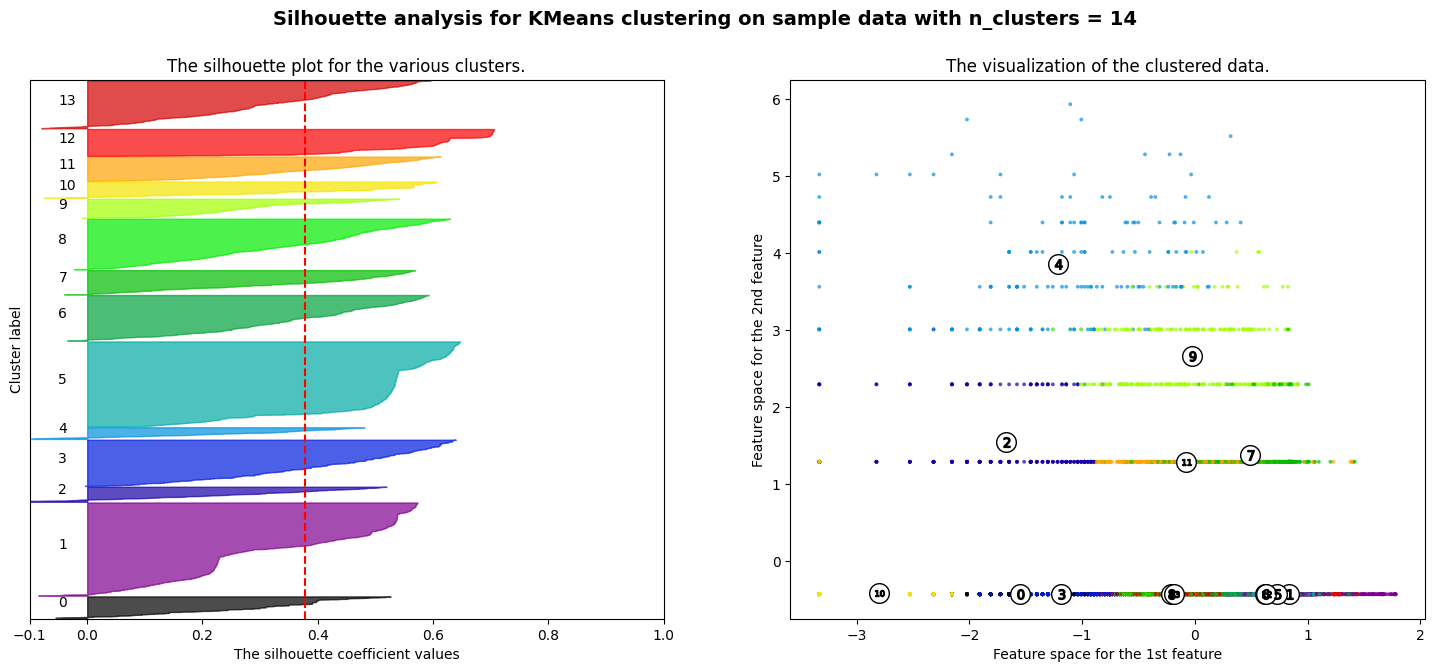

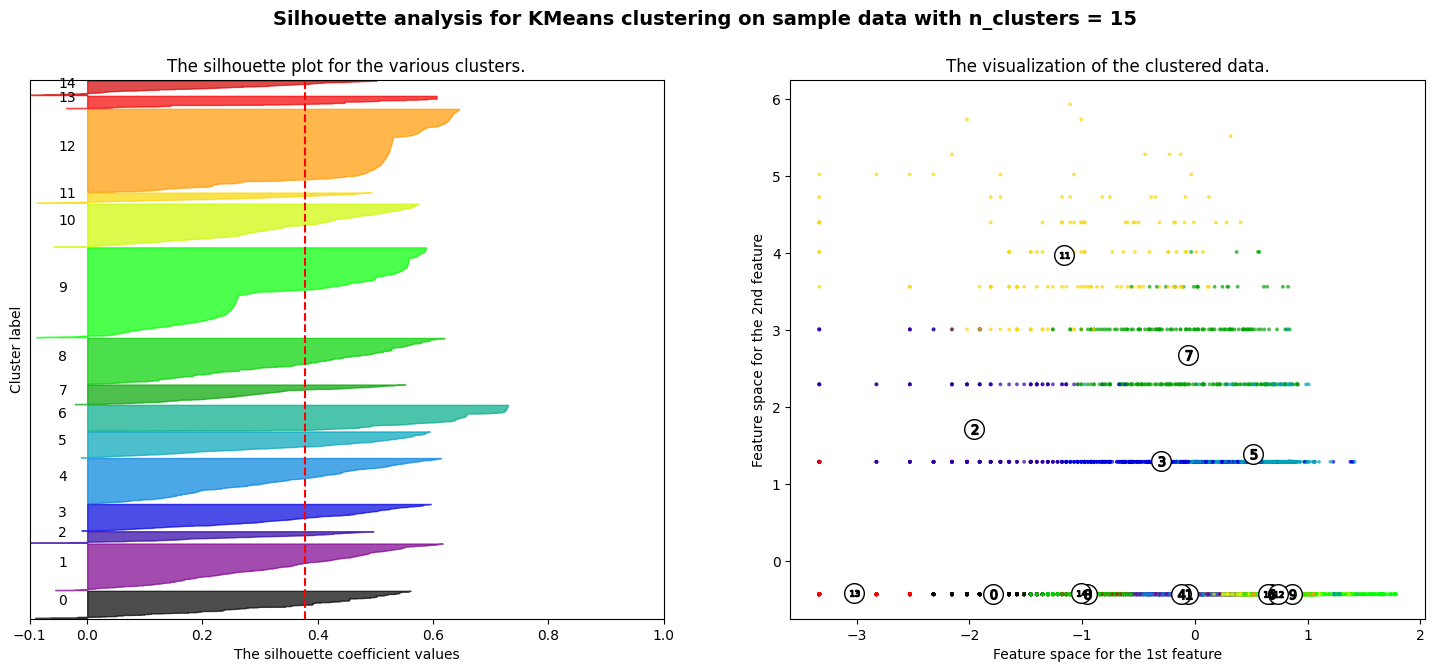

In [111]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

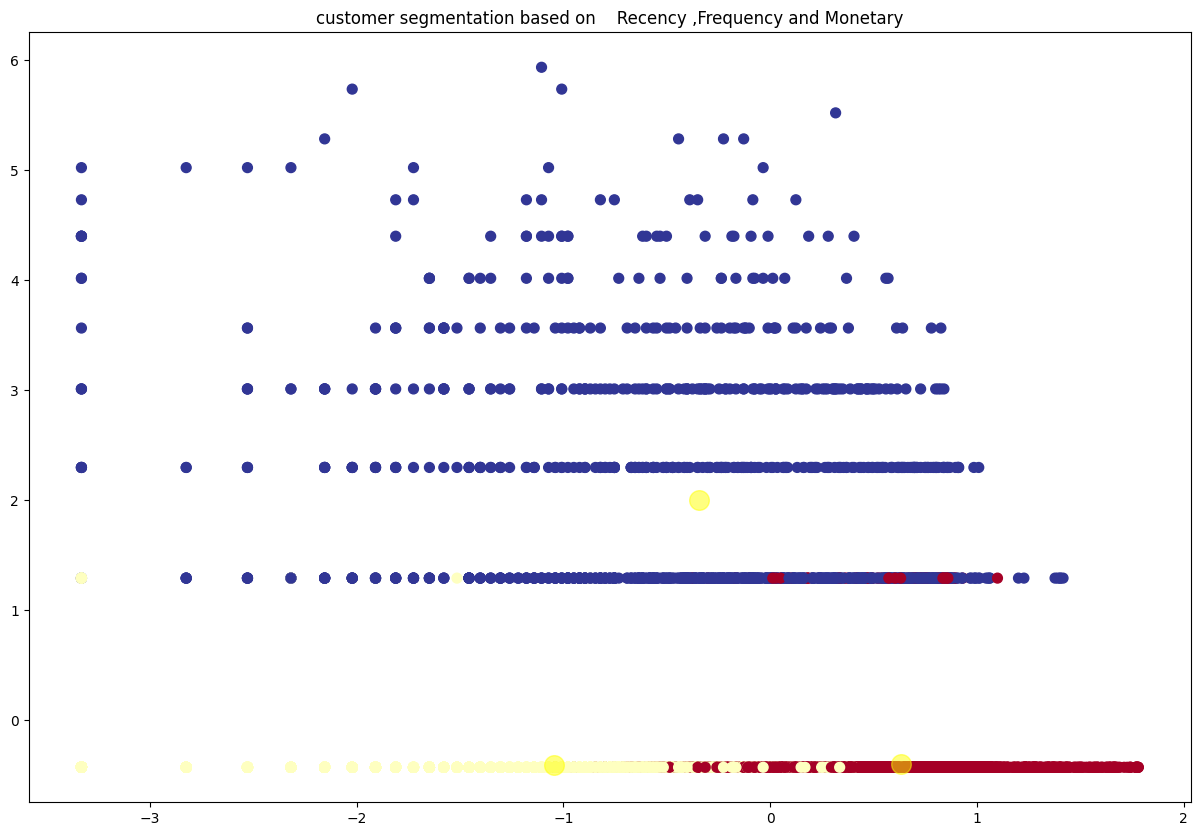

In [115]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

###**Applying Elbow Method on Recency ,Frequency and Monetary**

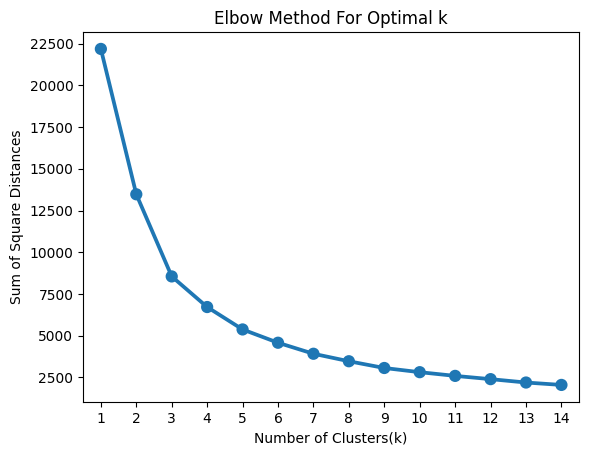

In [116]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [117]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  \
Reviewer                                                                      
#FOODPORN                         10          1      1750  1  4  1      141   
#chloesviews // CAH               15          1       500  1  4  4      144   
$ign                              74          1      1400  2  4  2      242   
4mybanti                          65          1      1400  2  4  2      242   
@FuloriBinaChutneyKaiseBani      992          1      1000  4  4  2      442   
@Vignesh #FoodMad                261          1       900  3  4  2      342   
@foodie.amy6 | AMNA              172          1       600  3  4  3      343   
A K                              307          1       500  4  4  4      444   
A K RAJEEV                       198          1       700  3  4  3      343   
A Vinod Kumar                    378          1       750  4  4  3      443   

                             RFMScore  Recency_log  Frequency_log  \
Reviewer                                                            
#FOODPORN                           6     2.302585            0.0   
#chloesviews // CAH                 9     2.708050            0.0   
$ign                                8     4.304065            0.0   
4mybanti                            8     4.174387            0.0   
@FuloriBinaChutneyKaiseBani        10     6.899723            0.0   
@Vignesh #FoodMad                   9     5.564520            0.0   
@foodie.amy6 | AMNA                10     5.147494            0.0   
A K                                12     5.726848            0.0   
A K RAJEEV                         10     5.288267            0.0   
A Vinod Kumar                      11     5.934894            0.0   

                             Monetary_log  Cluster  
Reviewer                                            
#FOODPORN                        7.467371        2  
#chloesviews // CAH              6.214608        2  
$ign                             7.244228        2  
4mybanti                         7.244228        2  
@FuloriBinaChutneyKaiseBani      6.907755        0  
@Vignesh #FoodMad                6.802395        0  
@foodie.amy6 | AMNA              6.396930        0  
A K                              6.214608        0  
A K RAJEEV                       6.551080        0  
A Vinod Kumar                    6.620073        0

###**Dendogram to find the optimal number of clusters**

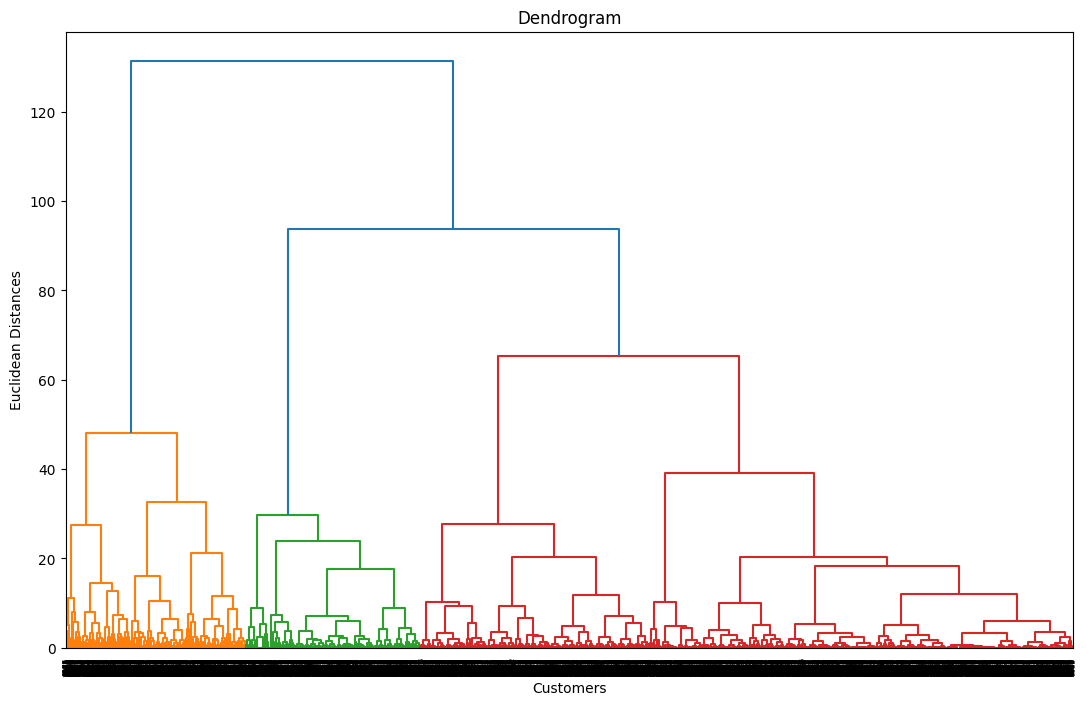

In [118]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [119]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

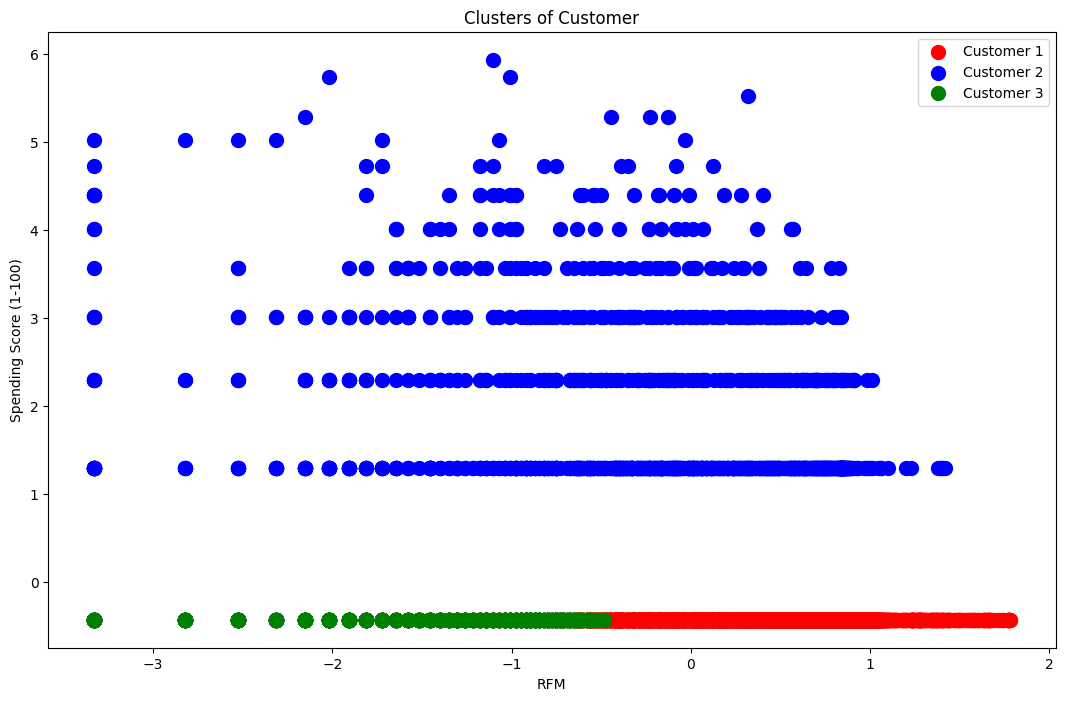

In [120]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Customer 3')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 - shapiro test(To check data is nornally distributed or not)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In [ ]:
df.head()

Name                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  Year  Day  Month  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  2019   25      5   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  2019   25      5   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  2019   24      5   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  2019   24      5   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0  2019   24      5   

   Hour  
0    15  
1    14  
2    22  
3    22  
4    21

* Null hypothesis H0= Data is normally distributed
* Alternative hypothesis Ha=Data is not normally distributed

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro

print('1 -Normality test using Shapiro wilk test')
from scipy.stats import shapiro
print('check P-value of Age Feature')
DataToCheck=df['Cost']
stat,p=shapiro(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)

print('check P-value of Vintage Feature')
DataToCheck=df['Rating']
stat,p=shapiro(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)

1 -Normality test using Shapiro wilk test
check P-value of Age Feature
stat=0.91,p=0.000000000000000000000000000000
Not normally distributed
--------------------------------------------------
check P-value of Vintage Feature
stat=0.81,p=0.000000000000000000000000000000
Not normally distributed
--------------------------------------------------


##### Which statistical test have you done to obtain P-Value?

* We used here shapiro test to check data is normally distributed or not.

##### Why did you choose the specific statistical test?

* To check distribution of data.

### Hypothetical Statement - 2  (K2-normality test)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis H0= Data is normally distributed
* Alternative hypothesis Ha=Data is not normally distributed

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
## USING K^2 NORMALITY TEST.
print('2 - Normality test using K^2 Normality test.\n\n')
from scipy.stats import normaltest
print('check P-value of Age Feature')
DataToCheck=df['Cost']
stat,p=normaltest(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)

print('check P-value of Vintage Feature')
DataToCheck=df['Rating']
stat,p=normaltest(DataToCheck)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("normal distribution")
else:
  print('Not normally distributed')
print('--'*25)



2 - Normality test using K^2 Normality test.


check P-value of Age Feature
stat=1764.76,p=0.000000000000000000000000000000
Not normally distributed
--------------------------------------------------
check P-value of Vintage Feature
stat=2373.31,p=0.000000000000000000000000000000
Not normally distributed
--------------------------------------------------


##### Which statistical test have you done to obtain P-Value?

* k2 normality test used here.

##### Why did you choose the specific statistical test?

* To check data distribution

### Hypothetical Statement - 3 -Correlation test.
 * 1- Pearson and Spearmans Rank Correlation for numerical data.
 * 2-Chi-square test categorical data.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* H0-Independent to each other
* Ha-Dependent to each other

#### 2. Perform an appropriate statistical test.

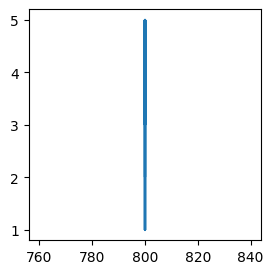

1- Spearmans Rank Correlation Age and Vehicle_Age.
check P-value 
stat=nan,p=nan
Dependent to each other
--------------------------------------------------
Rating  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
Cost                                               
150      52    0   17    0   13    0   22    0   95
200      88    2   37    0   51    8   71   12  131
300      23    0   10    0    8    0   19    0   40
350      42    0   15    0   32    1   89    0  120
400     206    0   50    0   70    0   96    0  177
450      41    0   16    0   15    0   44    0   83
500     276    0   96    0  147    0  254    0  427
550      43    2   20    0   40    7   91    4   93
600     178    0   80    1  107    1  232    2  274
650      13    0    7    0    8    0   29    1   42
700     128    1   50    4  109    3  225    6  273
750      63    0   21    4   46    4   53    1  107
800      76    0   27    0   54    0  121    0  222
850      19    0   15    0   10    0   22    0   34
900      60 

In [ ]:
# Perform Statistical Test to obtain P-Value
First_sample=df['Cost'][:100]
Second_sample=df['Rating'][:100]
plt.figure(figsize=(3,3))
plt.plot(First_sample,Second_sample)
plt.show()


# import
from scipy.stats import spearmanr,pearsonr

print('1- Spearmans Rank Correlation Age and Vehicle_Age.')

print('check P-value ')
stat,p=spearmanr(First_sample,Second_sample)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("Independent to each other")
else:
  print('Dependent to each other')
print('--'*25)


### FOR CHI_SQUARE TEST.
contigency_data=pd.crosstab(df['Cost'],df['Rating'],margins=False)
print(contigency_data)

#import library
from scipy.stats import chi2_contingency

print('1- using Chi^2 test Gender and Vehicle_damage.')

print('check P-value ')
stat,p,dof,expected=chi2_contingency(contigency_data)
print('stat=%.2f,p=%.30f'%(stat,p))
if p >0.05:
  print("Independent to each other")
else:
  print('Dependent to each other')
print('--'*25)


##### Which statistical test have you done to obtain P-Value?

* We used here chi2-test and spearmanr test.

##### Why did you choose the specific statistical test?

* To check correlation between variable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation   (We did this above so just showing code here)

# droping na value from dataset except 'Collection' variable
# df.dropna(subset=['Name', 'Links', 'Cost', 'Cuisines', 'Timings',
#        'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
#        'Pictures'],inplace=True)

# We drop Collections variable just because it has more than 50 % null value
df.drop('Collections',axis=1,inplace=True)

# we also ignore other variable for clustering, just only consider some variable that directly impact on Sales.
df=df[['Review','Rating','Cuisines','Cost']]

In [ ]:
df=df[['Review','Rating','Cuisines','Cost']]

In [ ]:
df.head(1)

Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   

                                            Cuisines  Cost  
0  Chinese, Continental, Kebab, European, South I...   800

#### What all missing value imputation techniques have you used and why did you use those techniques?

* We just drop none value just because its percent less than 0.1

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
df.columns

Index(['Review', 'Rating', 'Cuisines', 'Cost'], dtype='object')

In [ ]:
# Encode your categorical columns

# variable 'Cuisines' has different category so we replace it by number to fit in models.
#cuisines has one entry 3 so we remove it from data
df=df[df['Cuisines']!='3']

# import labelEncoder to replace text data into numbers
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df['Cuisines']=label.fit_transform(df['Cuisines'])


#### What all categorical encoding techniques have you used & why did you use those techniques?

* We used here LabelEncoder just because it convert all data into numerical form in single columns.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
df['Review']

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9854, dtype: object

#### 2. Lower Casing

In [ ]:
# Lower Casing

#create function that convert all sentense into lower case

def Lowercasing(X):
  """Lowering the text"""
  return X.lower()

#Convert to lowrcase
df['Review']=df['Review'].apply(Lowercasing)

In [ ]:
df['Review'][0]

'the ambience was good, food was quite good . had saturday lunch , which was cost effective .\ngood place for a sate brunch. one can also chill with friends and or parents.\nwaiter soumen das was really courteous and helpful.'

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

# Create function to remove punctuations

def Remove_punctuation(X):
  Conv=[i for i in X if i not in string.punctuation]
  return ''.join(Conv)

df['Review']=df['Review'].apply(Remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#Remove numbers from sentense

def remove_num(X):
  '''Remove number from sentense'''
  rem=[i for i in X if i not in range(10)]
  return ''.join(rem)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

pd.set_option('display.max_colwidth',None)
#Create function that remove Stopwords, Punctuation,
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
#Create in above function
df['Review']=df['Review'].apply(text_process)

In [ ]:
df['Review'][0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

In [ ]:
# Remove White spaces (Already removed above)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
CountVect = vectorizer.fit_transform(df['Review'])

In [ ]:
CountVect.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
vectorizer.get_feature_names_out()

array(['05', '10', '100', ..., 'zega', 'zero', 'zomato'], dtype=object)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
df['Review'].shape

(9854,)

In [ ]:
df['Review']=df['Review'].apply(stemming)

In [ ]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
CountVect_stem = vectorizer.fit_transform(df['Review'])


In [ ]:
print('Shape of data before stemming -\n',CountVect.shape)

Shape of data before stemming -
 (9854, 2667)


In [ ]:
print('Shape of data after stemming -\n',CountVect_stem.shape)

Shape of data after stemming -
 (9854, 2178)


In [ ]:
vectorizer.get_feature_names_out()

array(['05', '10', '100', ..., 'zero', 'zing', 'zomato'], dtype=object)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
pd.get_option('display.max_columns',None)

20

In [ ]:
df['Review'][0]

'ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen das realli courteous help'

In [ ]:
# Vectorizing Text
a=pd.DataFrame(CountVect_stem.toarray())
a.columns=vectorizer.get_feature_names_out()

In [ ]:
a.head()

05  10  100  1010  10d  10pm  10th  11  12  1200  ...  youv  yum  yumm  \
0   0   0    0     0    0     0     0   0   0     0  ...     0    0     0   
1   0   0    0     0    0     0     0   0   0     0  ...     0    0     0   
2   0   0    0     0    0     0     0   0   0     0  ...     0    0     0   
3   0   0    0     0    0     0     0   0   0     0  ...     0    0     0   
4   0   0    0     0    0     0     0   0   0     0  ...     0    0     0   

   yummi  yummm  zafrani  zega  zero  zing  zomato  
0      0      0        0     0     0     0       0  
1      0      0        0     0     0     0       0  
2      0      0        0     0     0     0       0  
3      0      0        0     0     0     0       0  
4      0      0        0     0     0     0       0  

[5 rows x 2178 columns]

##### Which text vectorization technique have you used and why?

* We used here CountVectorizer it is easy to understand.

### 4. Feature Manipulation & Selection

In [ ]:
df.head(2)

Review  \
0  ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen das realli courteous help   
1                                                               ambienc good pleasant even servic prompt food good good experi soumen das kudo servic   

   Rating  Cuisines  Cost  
0     5.0        31   800  
1     5.0        31   800

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

df.corr()

#here no need to do feature manipulation

Rating  Cuisines      Cost
Rating    1.000000 -0.044366  0.144864
Cuisines -0.044366  1.000000  0.055429
Cost      0.144864  0.055429  1.000000

In [ ]:
# Final data base
df=pd.concat([df,a],axis=1)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
print('We only consider below features -\n',df.columns)

We only consider below features -
 Index(['Review', 'Rating', 'Cuisines', 'Cost', '05', '10', '100', '1010',
       '10d', '10pm',
       ...
       'youv', 'yum', 'yumm', 'yummi', 'yummm', 'zafrani', 'zega', 'zero',
       'zing', 'zomato'],
      dtype='object', length=2182)


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Cost'].isna().sum()

0

In [ ]:
df['Cost'].shape


(9708,)

In [ ]:
# Transform Your data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


### 6. Data Scaling

In [ ]:
# Scaling your data

df['Cost']=scaler.fit_transform(df[['Cost']])

##### Which method have you used to scale you data and why?
* We have used standard scaler method

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In [ ]:
df.head()

Review  \
0  ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen das realli courteous help   
1                                                               ambienc good pleasant even servic prompt food good good experi soumen das kudo servic   
2                        must tri great food great ambienc thnx servic pradeep subroto person recommend penn alfredo pasta also music background amaz   
3                                                                 soumen das arun great guy behavior sincereti good food cours would like visit place   
4                                          food goodw order kodi drumstick basket mutton biryani good thank pradeep serv well enjoy ambienc also good   

   Rating  Cuisines      Cost   05   10  100  1010  10d  10pm  ...  youv  yum  \
0     5.0      31.0 -0.142463  0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0  0.0   
1     5.0      31.0 -0.142463  0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0  0.0   
2     5.0      31.0 -0.142463  0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0  0.0   
3     5.0      31.0 -0.142463  0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0  0.0   
4     5.0      31.0 -0.142463  0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0  0.0   

   yumm  yummi  yummm  zafrani  zega  zero  zing  zomato  
0   0.0    0.0    0.0      0.0   0.0   0.0   0.0     0.0  
1   0.0    0.0    0.0      0.0   0.0   0.0   0.0     0.0  
2   0.0    0.0    0.0      0.0   0.0   0.0   0.0     0.0  
3   0.0    0.0    0.0      0.0   0.0   0.0   0.0     0.0  
4   0.0    0.0    0.0      0.0   0.0   0.0   0.0     0.0  

[5 rows x 2182 columns]

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X=df.drop('Review',axis=1)

##### What data splitting ratio have you used and why?

* Clustering problem

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - KMean Clustering

   num_clusters  cluster_errors
0             1    6.449254e+06
1             2    1.855032e+06
2             3    1.067164e+06
3             4    7.583493e+05
4             5    6.019547e+05
5             6    5.279609e+05
6             7    4.886469e+05
7             8    4.538666e+05
8             9    4.353359e+05


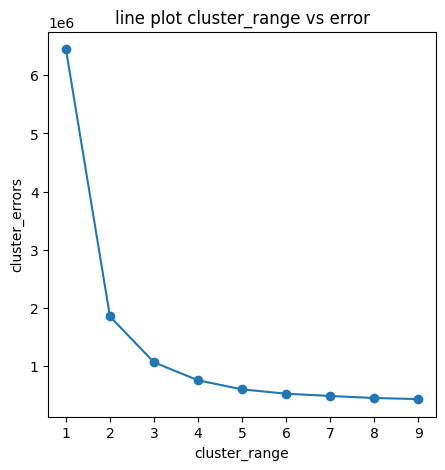

silhouette_score if n=3 is -
 0.4761165075999524


In [ ]:
# ML Model - 1 Implementation

from sklearn.cluster import KMeans

# Let us check optimal number of clusters-

cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
print(clusters_df[0:15])
plt.figure(figsize=(5,5))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.title('line plot cluster_range vs error')
plt.xlabel('cluster_range')
plt.ylabel('cluster_errors')
plt.show()


# Fit the Algorithm
kmean=KMeans(3,n_init=5)
kmean=kmean.fit(X)


# Predict on the model
y=kmean.predict(X)
#y=kmean.predict(X)
from sklearn.metrics import silhouette_score
score=silhouette_score(X,y)

print('silhouette_score if n=3 is -\n',score)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

score=silhouette_score(X,y)

print('silhouette_score if n=3 is -\n',score)

silhouette_score if n=3 is -
 0.4761165075999524


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Not required
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 - Hierarchical Clustering

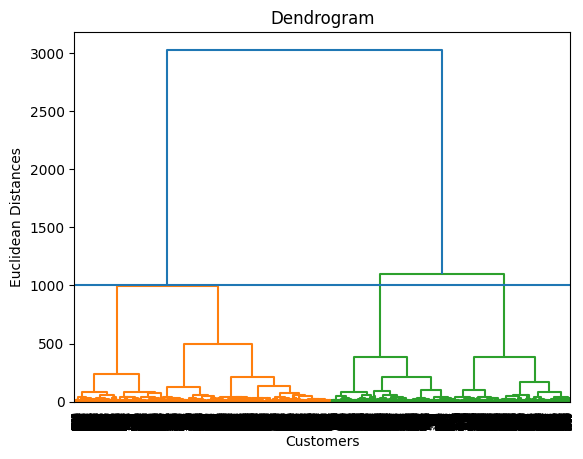

In [ ]:
# ML Model - 2 Implementation
#X=X.drop('Y_label',axis=1)

# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=1000)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

#Fitting model

# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc_ = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc_.fit_predict(X)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
y_hc

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Visualizing evaluation Metric Score chart

#importing
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X, y_hc)

print('Silhouette score for n=3 is:\n', silhouette_score_value)

Silhouette score for n=3 is:
 0.4470714443316385


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - Principle Component Analysis (PCA) with KMean and Hierarchical Clustering

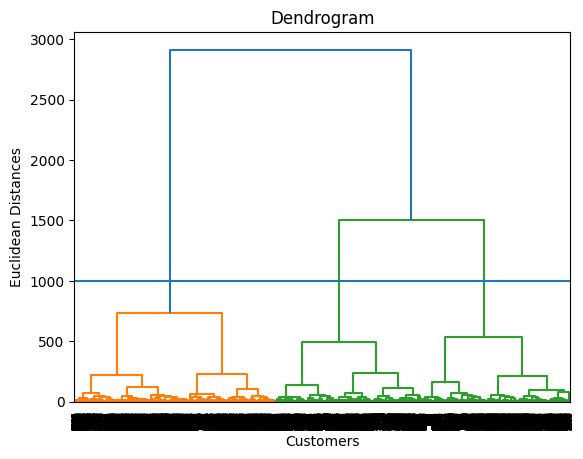

Silhouette score with pca and hierarchy clustering for n=3 is:
 0.5486105615464559
--------------------------------------------------------------------------------
   num_clusters  cluster_errors
0             1    6.165194e+06
1             2    1.571001e+06
2             3    7.832211e+05
3             4    4.745448e+05
4             5    3.182744e+05
5             6    2.443964e+05
6             7    2.048978e+05
7             8    1.705618e+05
8             9    1.526619e+05


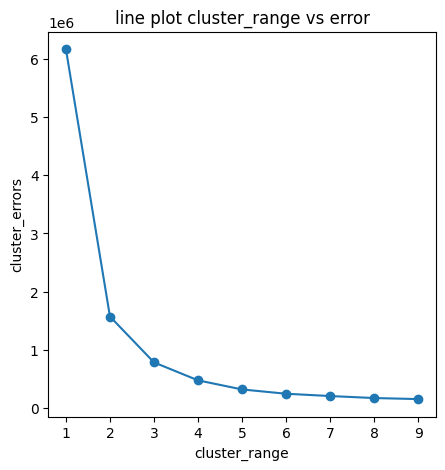

silhouette_score if n=3 is -
 0.5482140299402636


In [ ]:
# ML Model - 3 Implementation

#import pca
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
# fit pca
X_tr = pca.fit_transform(X)
X_tr=pd.DataFrame(X_tr)
# check clustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_tr, method = 'ward'))
plt.axhline(y=1000)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

# used AgglomerativeClustering here
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_tr)

from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X_tr, y_hc)

print('Silhouette score with pca and hierarchy clustering for n=3 is:\n', silhouette_score_value)
print('--'*40)



cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X_tr)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
print(clusters_df[0:15])
plt.figure(figsize=(5,5))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.title('line plot cluster_range vs error')
plt.xlabel('cluster_range')
plt.ylabel('cluster_errors')
plt.show()


# Fit the Algorithm
kmean=KMeans(3,n_init=5)
X_fit=kmean.fit(X_tr)


# Predict on the model
Y_label=X_fit.predict(X_tr)
#X['Y_label']=X_fit.predict(X_tr)
from sklearn.metrics import silhouette_score
score=silhouette_score(X_tr,Y_label)

print('silhouette_score if n=3 is -\n',score)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* We used above, three different ml model then we got highest silhouette_score after transforming variable by using principle component analysis and then after applying Hierarchical Clustering (0.5491).

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* we used Hierarchical Clustering with pca model to predict category.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

* We selected PCA with Hierarchical Clustering model to predict category of data or for clustering data.it is giving us higher silhouette_score (.5486) as compare to other.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

#save file in pickle
import pickle
pickle.dump(hc,open('hc_final_model','wb'))



# Save file in joblib
import joblib
joblib.dump(hc,'hc_final_model1')



array([0, 0, 1, 1, 0, 2, 1, 0, 1, 0])

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
print('by using pickle file')
pickle1=pickle.load(open('hc_final_model','rb'))
print(pickle1.fit_predict(X_tr[:10]))

print('\nby using joblib file')
joblib1=joblib.load('hc_final_model1')
print(joblib1.fit_predict(X_tr[:10]))


by using pickle file
[0 0 1 1 0 2 1 0 1 0]

by using joblib file
[0 0 1 1 0 2 1 0 1 0]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* We have clustered data in 3 types in this project with achieving highest Silhouette score 0.5486.
* 'Restaurant Collage - Hyatt Hyderabad Gachibowli'  has highest average cost (2800) and Restaurant '3' has lowest average cost (3)
* Highest average rating for restaurant AB's - Absolute Barbecues (4.88)
* Lowest average rating for restaurant Hotel Zara Hi-Fi (2.4)
* Sales is increasing year on year.
* Sales is high during month april to july.
* Highest sales in night (10 PM) and then afternoon (2 PM).
* There is coming 5 star review 38.6% and 1 star 17.4%
* Highest rate of dish - Continental, Italian, North Indian, Chinese, Asian    (2800.0)

* Lowest rate of dish - Street Food, Arabian (150.0)
* Lowest time serv Cuisines is  "American, Fast Food, Salad, Burger" (77)
* Highest time serv Cuisines is "North Indian, Chinese" (397)

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***